In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import pickle
import seaborn as sns
import model_helper as m
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
data = pd.read_pickle('data2.pkl')
print(data.columns)

Index(['offer_id', 'viewed_and_above_mean', 'mobile', 'email', 'web', 'social',
       'F', 'M', 'O', '2013', '2014', '2015', '2016', '2017', '2018',
       'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'age_10s', 'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s',
       'age_70s+', 'income_30k-50k', 'income_50k-70k', 'income_70k-90k',
       'income_90k+', 'spent_0-20', 'spent_20-100', 'spent_100-200',
       'spent_200-300', 'spent_300-400', 'spent_400+', 'freq_0-5', 'freq_5-10',
       'freq_10-15', 'freq_15-20', 'freq_20+', 'spent_u_0-5', 'spent_u_5-10',
       'spent_u_10-20', 'spent_u_20+'],
      dtype='object')


I will build a classifier for each offer id and in each model, the main process includes:
    1. try to fit the 4 base model and print the cross validated roc_auc score, PR auc score, and plot the recall vs precsion. 
    2. check the two methods to deal with imbalanced dataset:
       * over sample the minority class
       * change the class weight of the model
    3. plot the feature importance
    4. grid search the parameters such as the max depth of the tree, the over sampling ratio, class weight.
    5. evaluate the model performace in the test dataset

### Offer 0

1. Fit the 4 base model and print the cross validated roc_auc score, PR auc score, and plot the recall 
2. check the two methods to deal with imbalanced dataset

class 0 to class 1 ratio 5.746559633027523
The numbers of class 1 is  698 numbers of class 0 is 4008
************************************************************

Training XGBClassifier :
XGBClassifier
Time taken : 3.94 secs
roc_auc_weighted : 0.6294205758881658
PR AUC: 0.22690863550527024


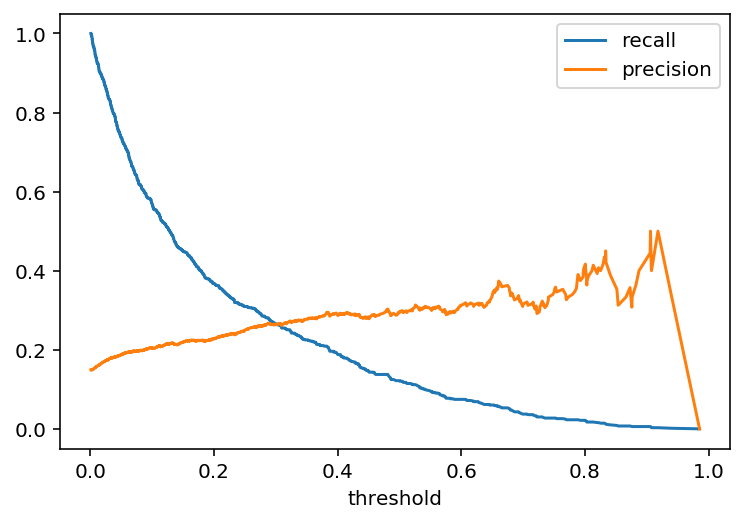

********************
Training RandomForestClassifier :
RandomForestClassifier
Time taken : 4.79 secs
roc_auc_weighted : 0.6416997002596198
PR AUC: 0.2186941583132061


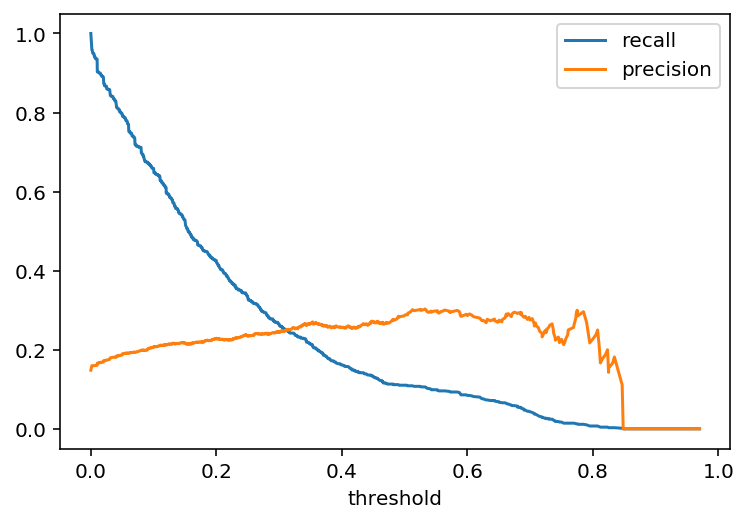

********************
Training AdaBoostClassifier :
AdaBoostClassifier
Time taken : 2.18 secs
roc_auc_weighted : 0.6818324770260288
PR AUC: 0.24113392709858156


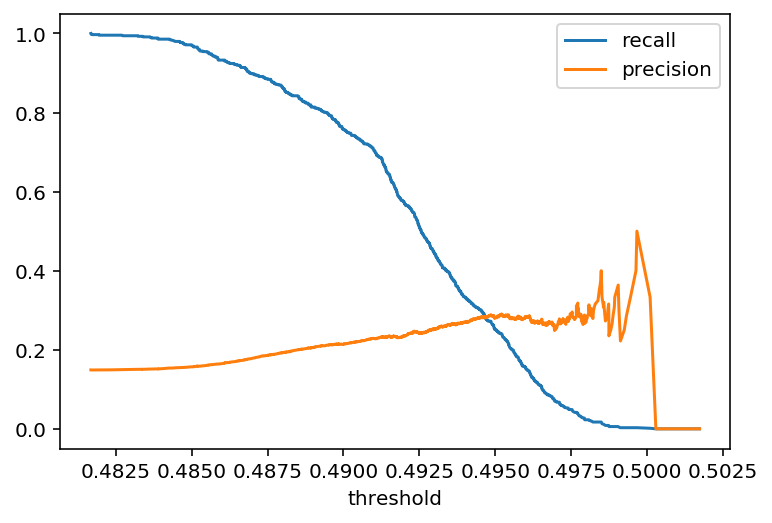

********************
With over sampling:****************************************
Training Pipeline :
Pipeline
Time taken : 6.23 secs
roc_auc_weighted : 0.6382272854696713
PR AUC: 0.22186545507110936


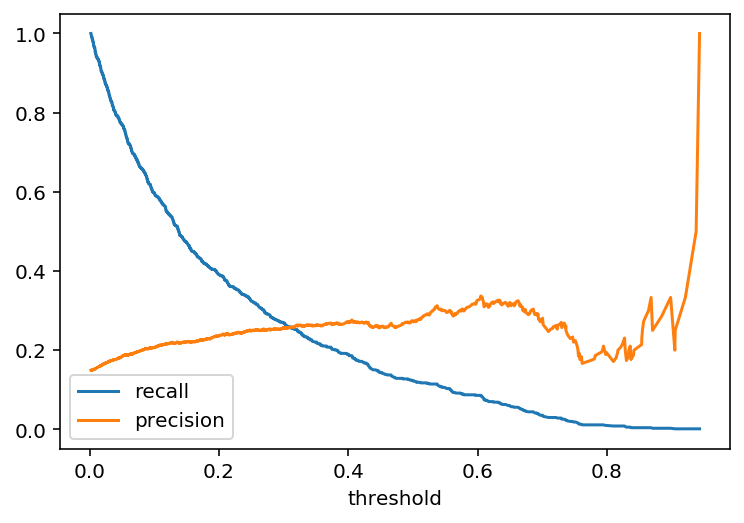

********************
Changing the class weighting hyperparameters:****************************************
Training XGBClassifier :
XGBClassifier
Time taken : 3.52 secs
roc_auc_weighted : 0.6212145227571454
PR AUC: 0.22146135217753443


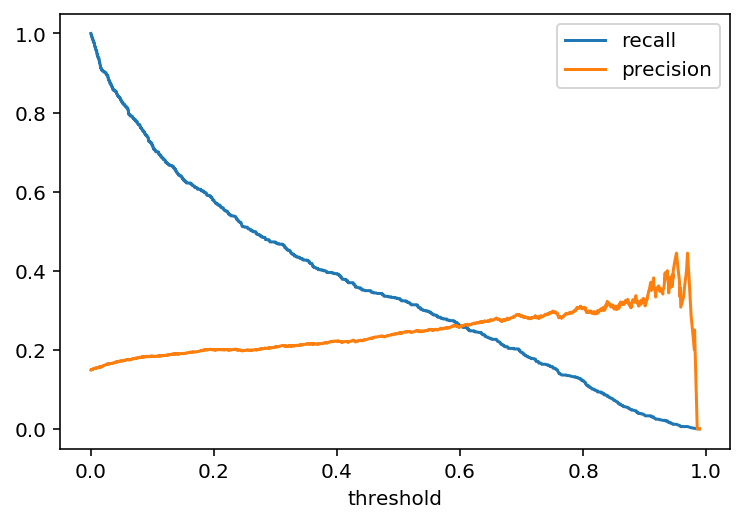

********************


In [3]:
X_train, X_test, y_train, y_test = m.generate_offer_data(data, 0)
m.try_base_models(X_train, y_train, 'roc_auc_ovr_weighted')
m.try_over_sample_and_changing_class_weight('XGBClassifier', X_train, y_train)

Plot the feature importance and evaluate the model performance in the test_dataset

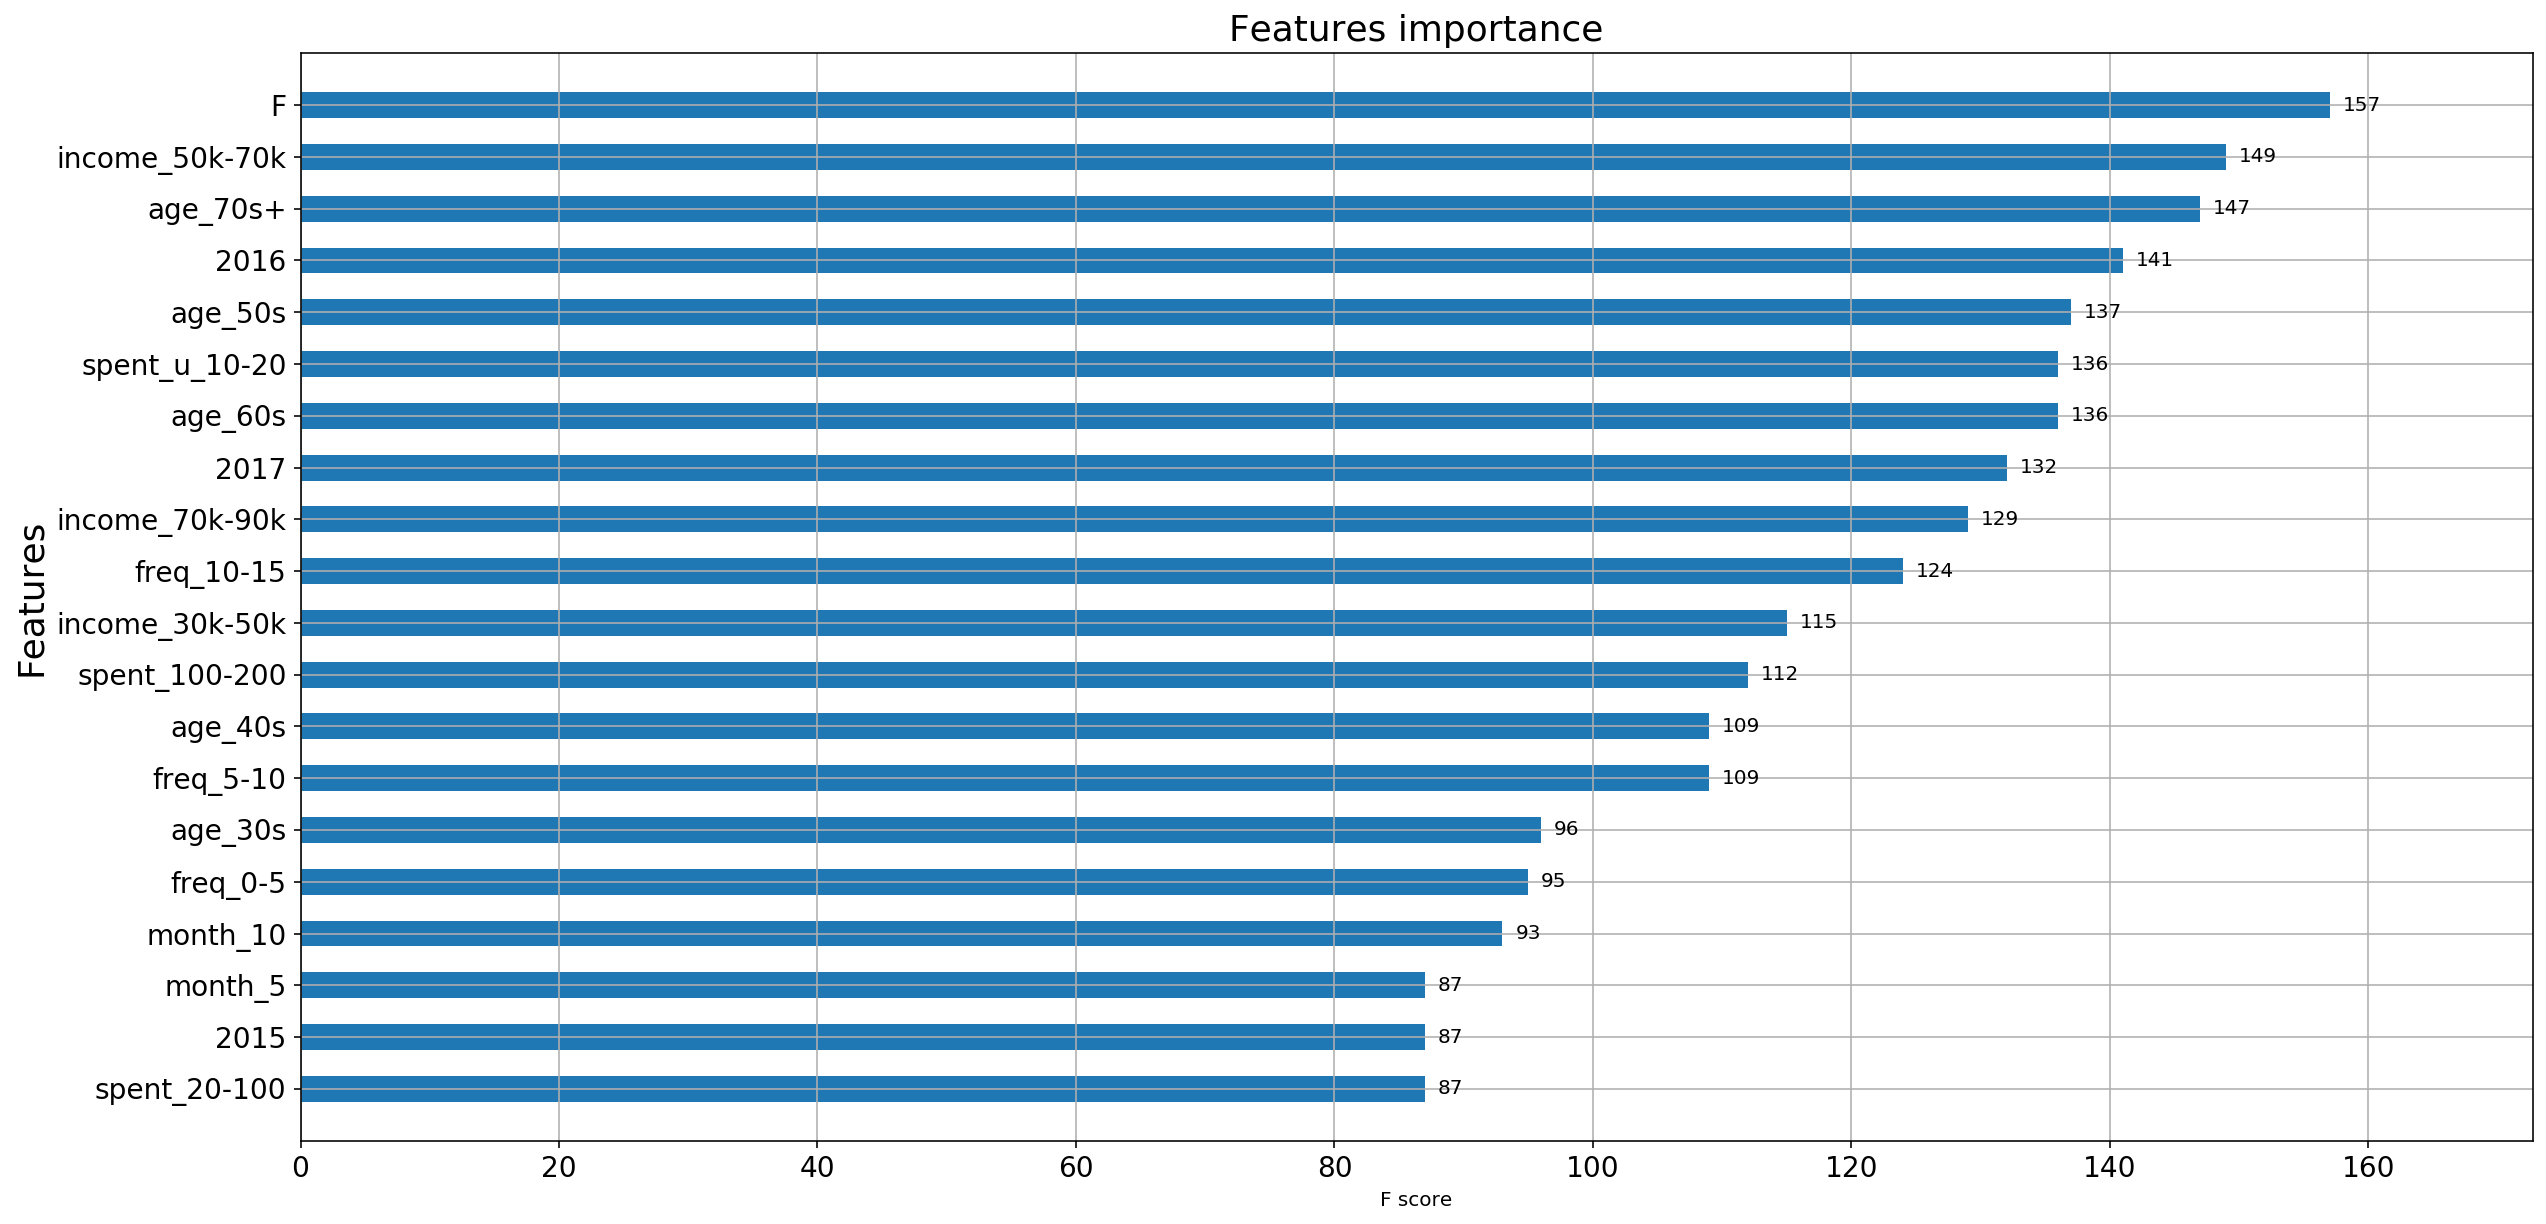

0.6382272854696713
{}
PR AUC: 0.21155250214087667

              precision    recall  f1-score   support

     class 0       0.90      0.60      0.72      1003
     class 1       0.21      0.61      0.31       174

    accuracy                           0.60      1177
   macro avg       0.55      0.60      0.51      1177
weighted avg       0.80      0.60      0.66      1177



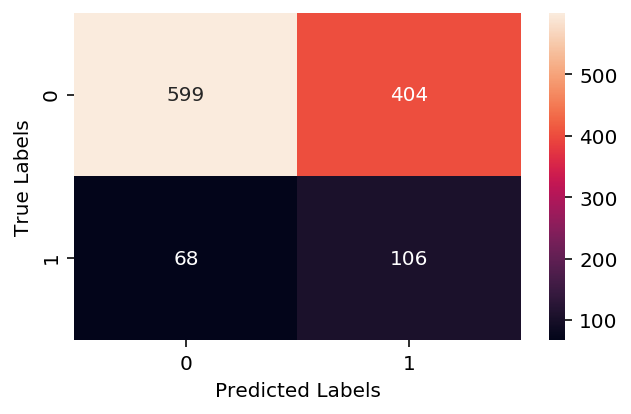

In [4]:
m.plot_feature_importance(X_train, y_train)
clf = m.grid_search(X_train, y_train)
m.evaluate_test_dataset(X_test, y_test, clf)

### Offer 1

1. Fit the 4 base model and print the cross validated roc_auc score, PR auc score, and plot the recall 
2. check the two methods to deal with imbalanced dataset

class 0 to class 1 ratio 5.746559633027523
The numbers of class 1 is  698 numbers of class 0 is 4008
************************************************************

Training XGBClassifier :
XGBClassifier
Time taken : 3.81 secs
roc_auc_weighted : 0.6273569185384531
PR AUC: 0.21196860933071388


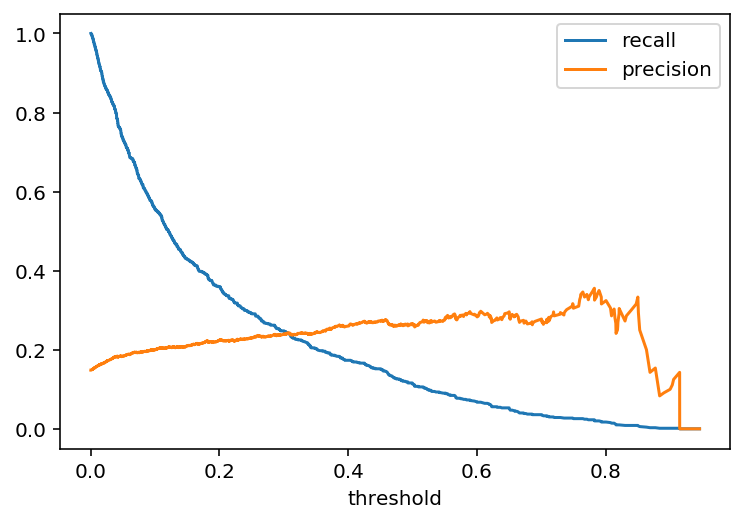

********************
Training RandomForestClassifier :
RandomForestClassifier
Time taken : 5.15 secs
roc_auc_weighted : 0.6427333636947172
PR AUC: 0.2134701490563054


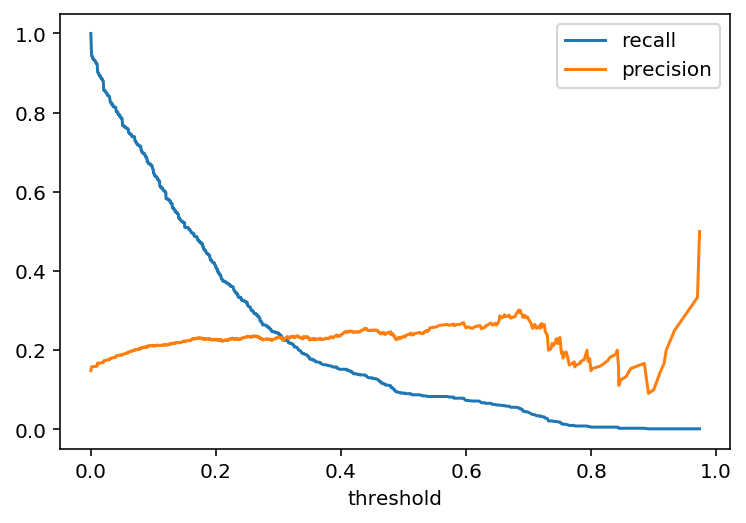

********************
Training AdaBoostClassifier :
AdaBoostClassifier
Time taken : 2.28 secs
roc_auc_weighted : 0.685422139474268
PR AUC: 0.23806278611045


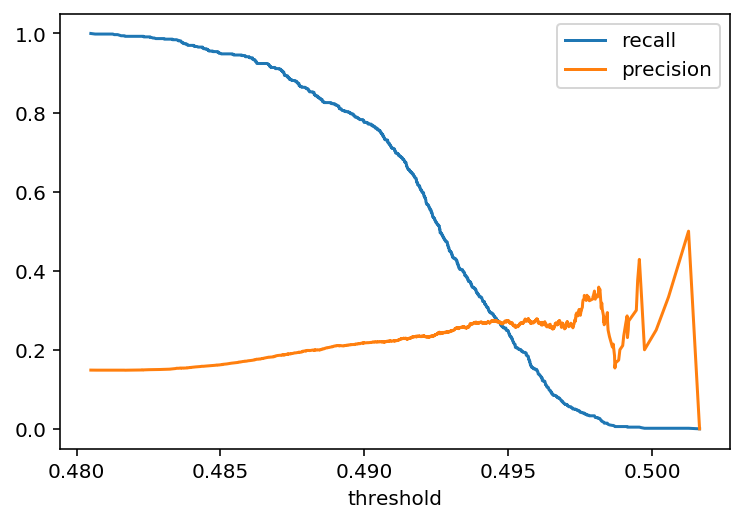

********************
With over sampling:****************************************
Training Pipeline :
Pipeline
Time taken : 6.59 secs
roc_auc_weighted : 0.6311322300787945
PR AUC: 0.21064534603203394


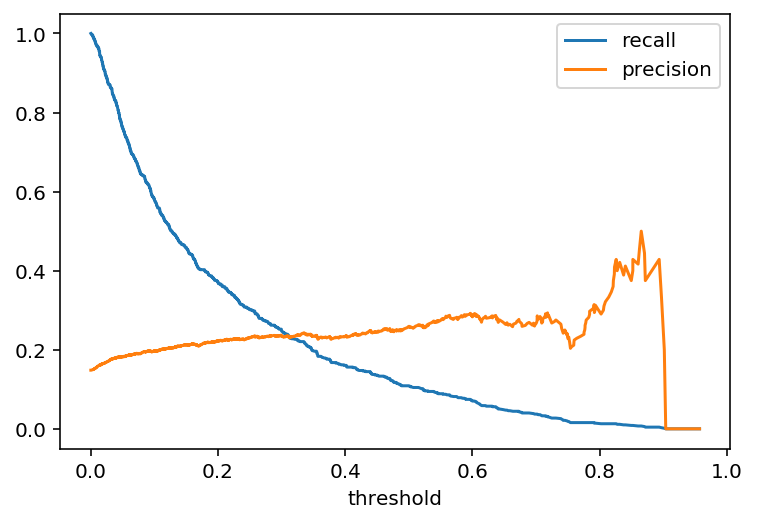

********************
Changing the class weighting hyperparameters:****************************************
Training XGBClassifier :
XGBClassifier
Time taken : 4.15 secs
roc_auc_weighted : 0.6192976087581599
PR AUC: 0.20648991867893995


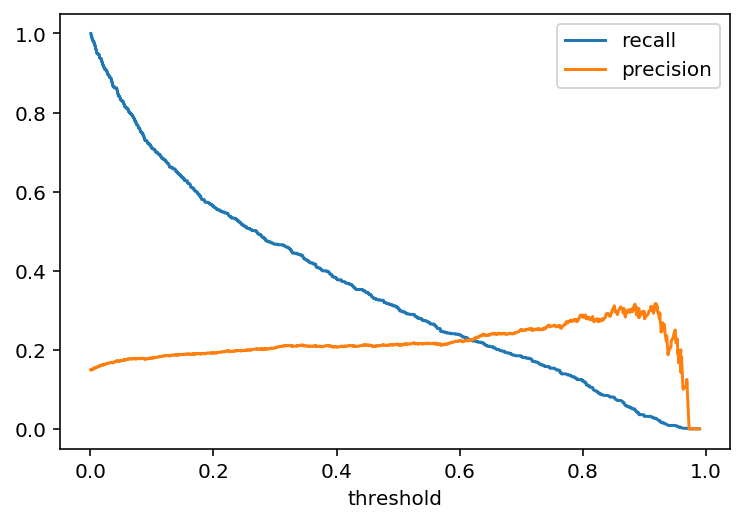

********************


In [5]:
X_train, X_test, y_train, y_test = m.generate_offer_data(data, 1.0)
m.try_base_models(X_train, y_train, 'roc_auc_ovr_weighted')
m.try_over_sample_and_changing_class_weight('XGBClassifier', X_train, y_train)

Plot the feature importance and evaluate the model performance in the test_dataset

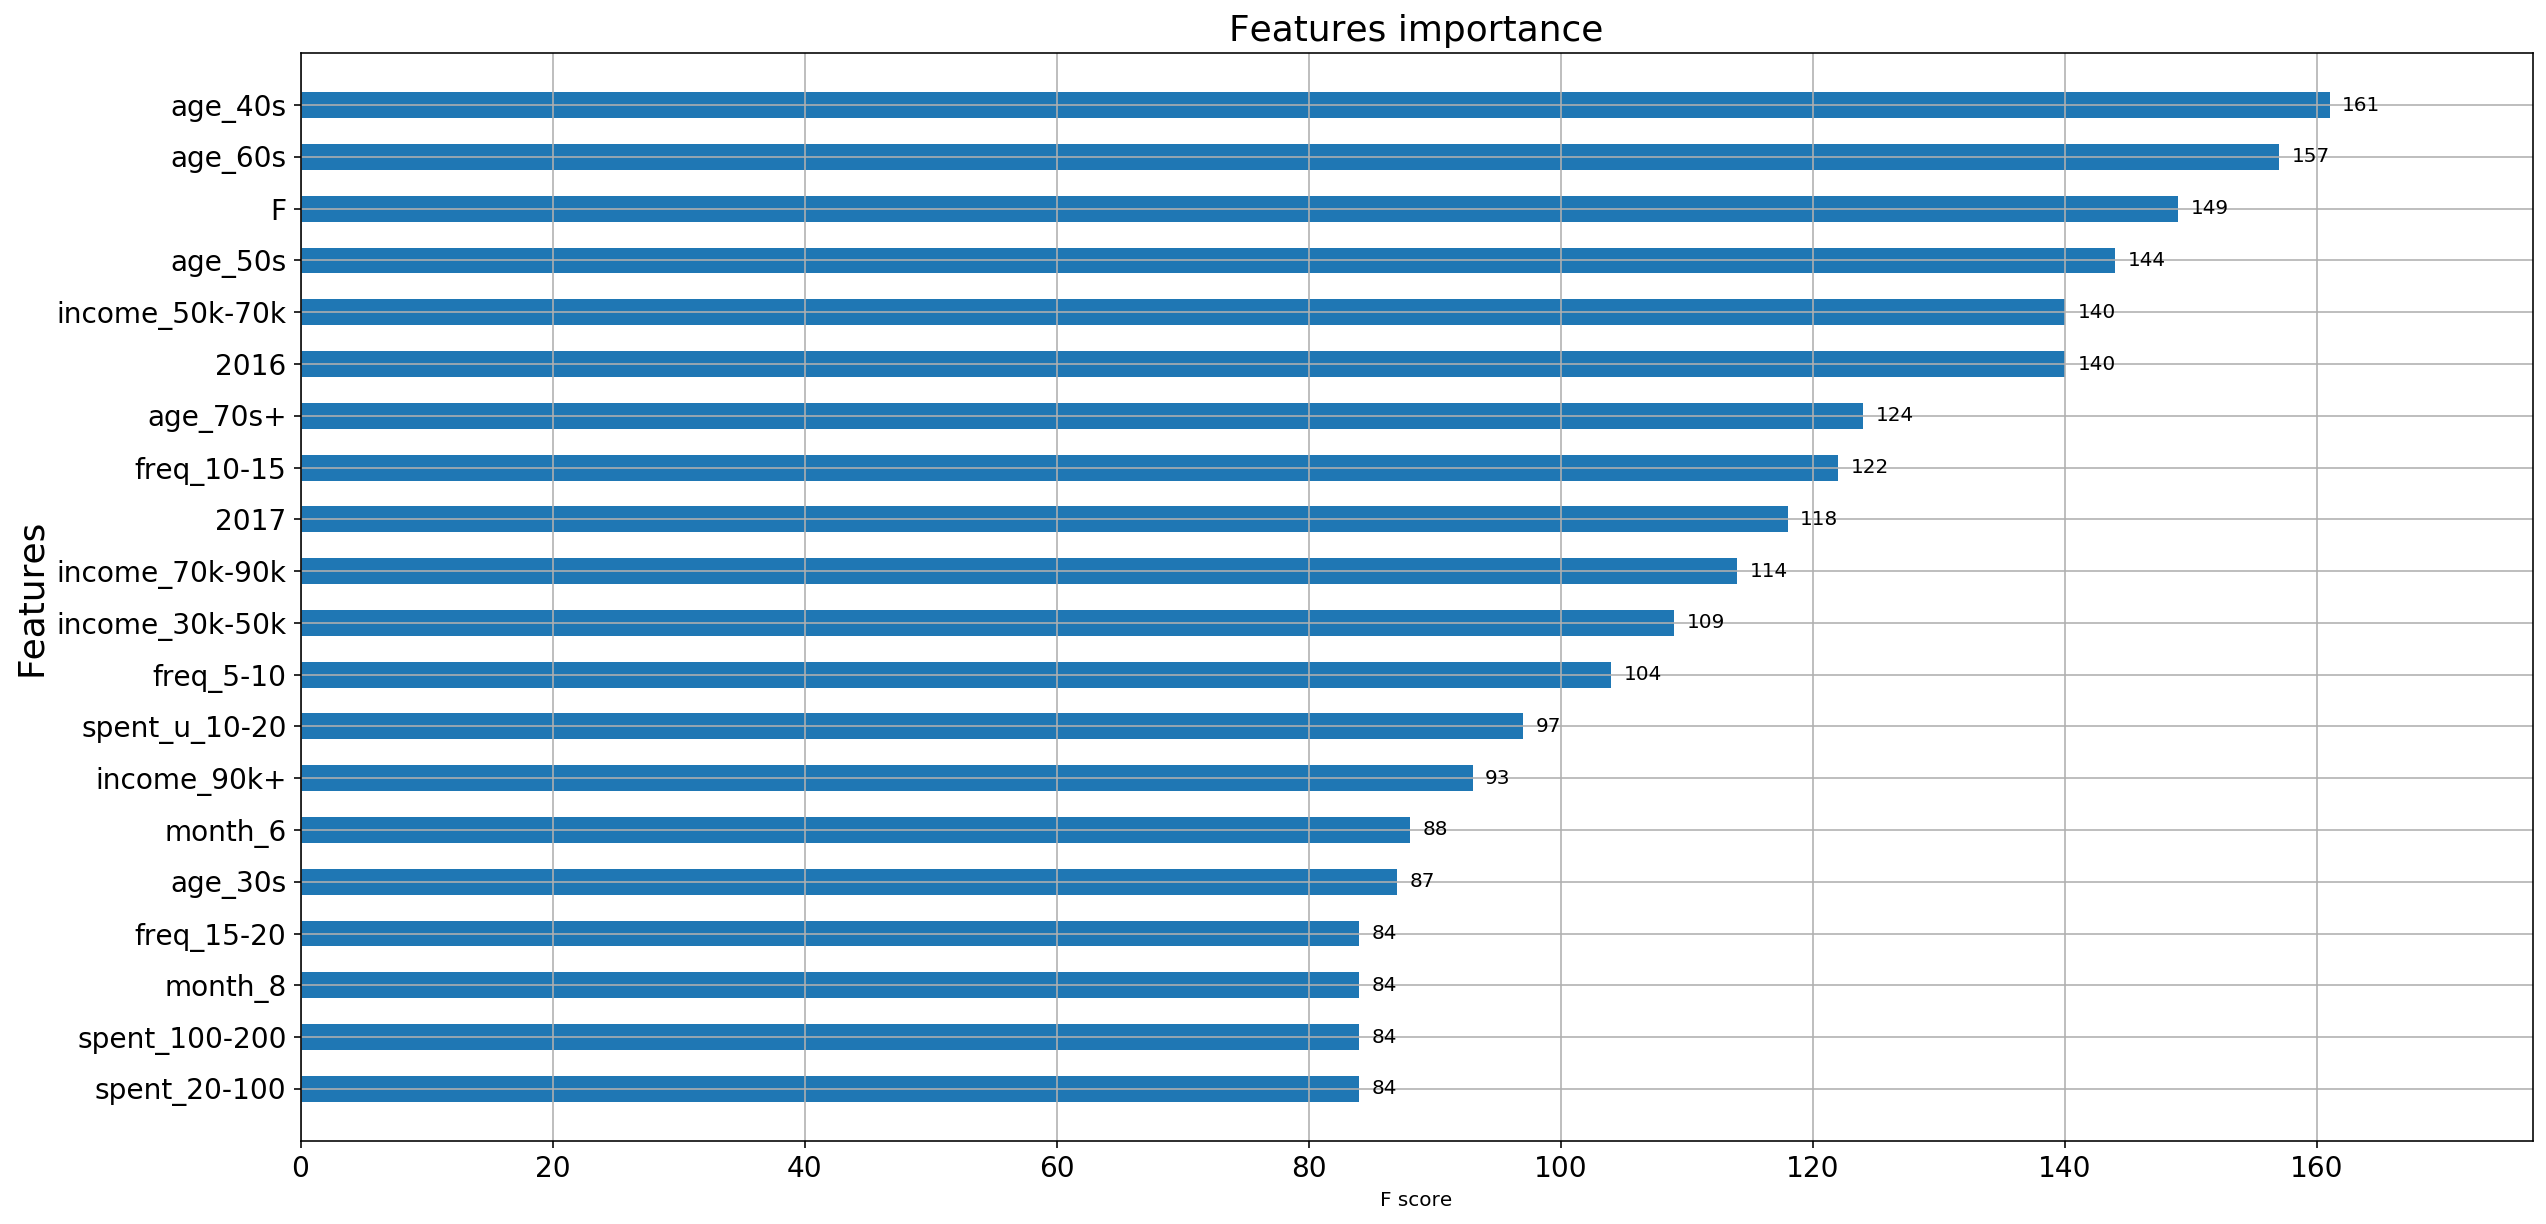

0.6311322300787945
{}
PR AUC: 0.20377291978123258

              precision    recall  f1-score   support

     class 0       0.89      0.57      0.69      1003
     class 1       0.19      0.58      0.29       174

    accuracy                           0.57      1177
   macro avg       0.54      0.58      0.49      1177
weighted avg       0.78      0.57      0.63      1177



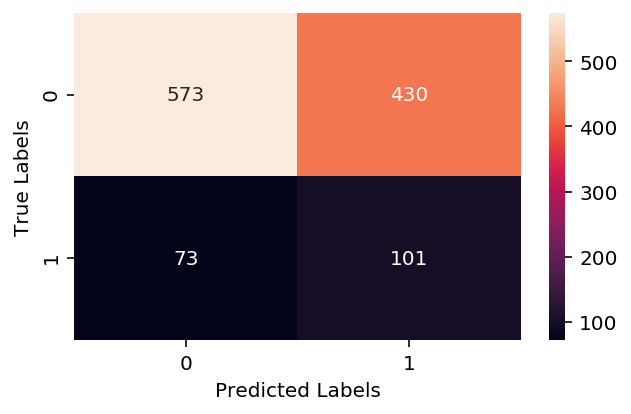

In [6]:
m.plot_feature_importance(X_train, y_train)
clf = m.grid_search(X_train, y_train)
m.evaluate_test_dataset(X_test, y_test, clf)

### offer 2

1. Fit the 4 base model and print the cross validated roc_auc score, PR auc score, and plot the recall 
2. check the two methods to deal with imbalanced dataset

class 0 to class 1 ratio 5.746559633027523
The numbers of class 1 is  698 numbers of class 0 is 4008
************************************************************

Training XGBClassifier :
XGBClassifier
Time taken : 3.8 secs
roc_auc_weighted : 0.6199845677950221
PR AUC: 0.22212914493570665


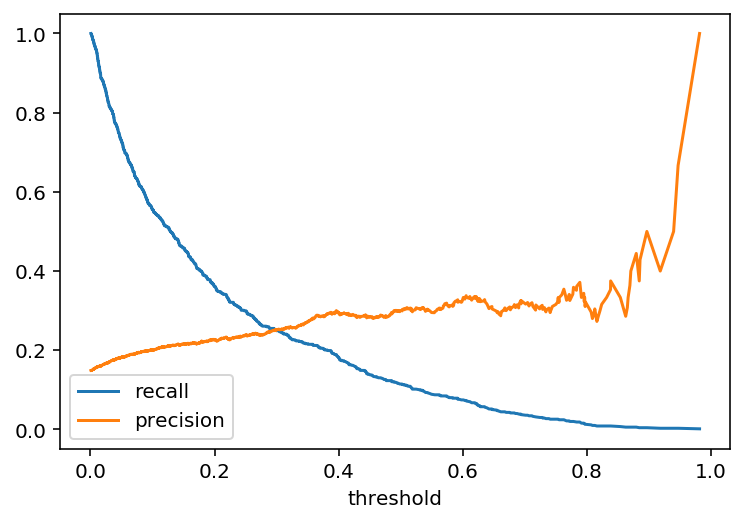

********************
Training RandomForestClassifier :
RandomForestClassifier
Time taken : 5.11 secs
roc_auc_weighted : 0.6284357750200545
PR AUC: 0.2157629348359531


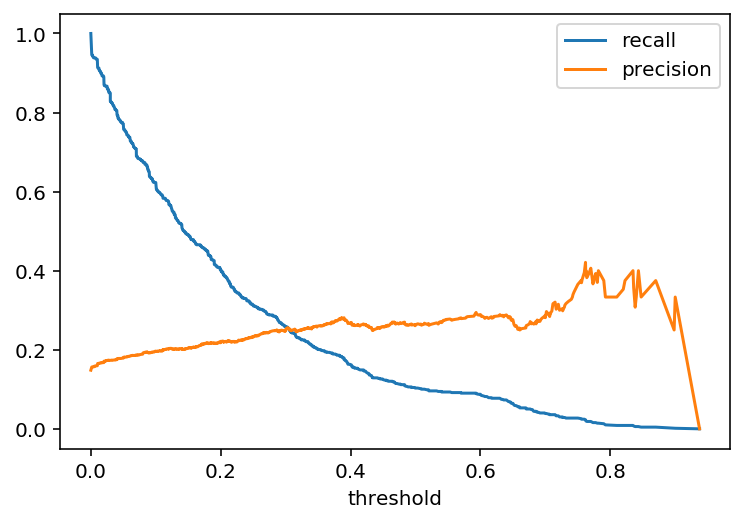

********************
Training AdaBoostClassifier :
AdaBoostClassifier
Time taken : 2.17 secs
roc_auc_weighted : 0.6744876664338356
PR AUC: 0.24986545509169572


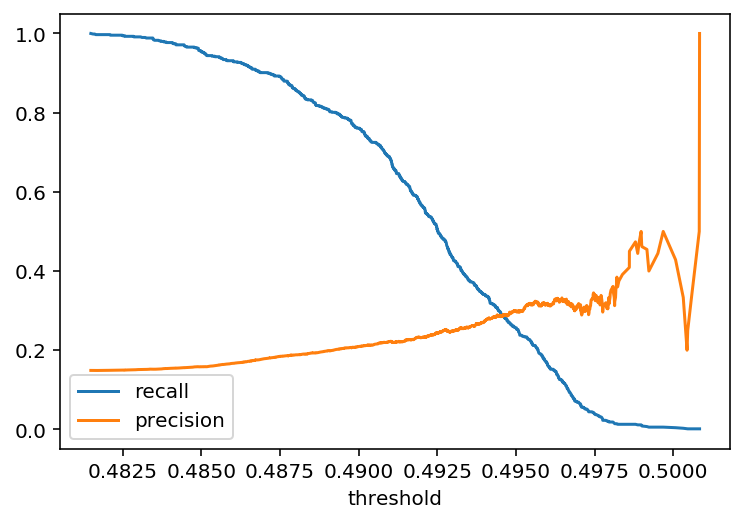

********************
With over sampling:****************************************
Training Pipeline :
Pipeline
Time taken : 7.79 secs
roc_auc_weighted : 0.6248502456499127
PR AUC: 0.21926208200359898


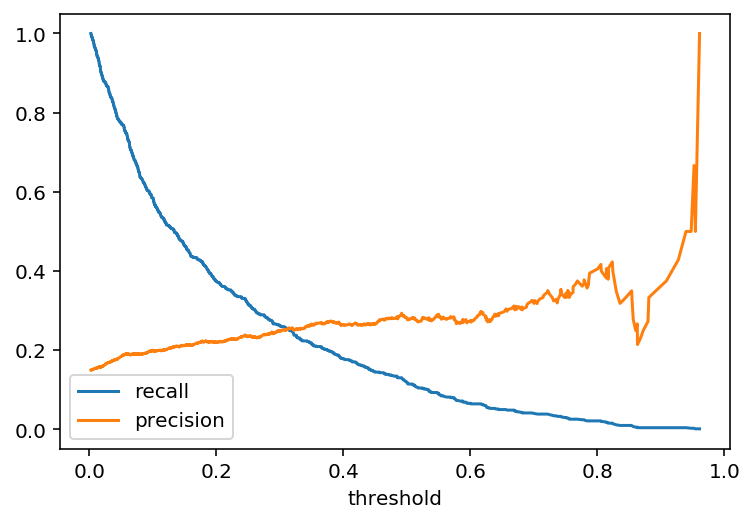

********************
Changing the class weighting hyperparameters:****************************************
Training XGBClassifier :
XGBClassifier
Time taken : 3.88 secs
roc_auc_weighted : 0.6095761793434484
PR AUC: 0.20901473272165988


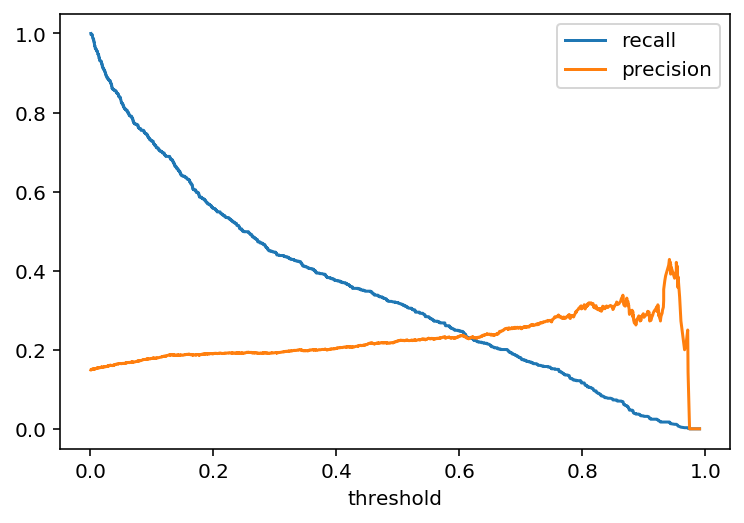

********************


In [7]:
X_train, X_test, y_train, y_test = m.generate_offer_data(data, 2.0)
m.try_base_models(X_train, y_train, 'roc_auc_ovr_weighted')
m.try_over_sample_and_changing_class_weight('XGBClassifier', X_train, y_train)

Plot the feature importance and evaluate the model performance in the test_dataset

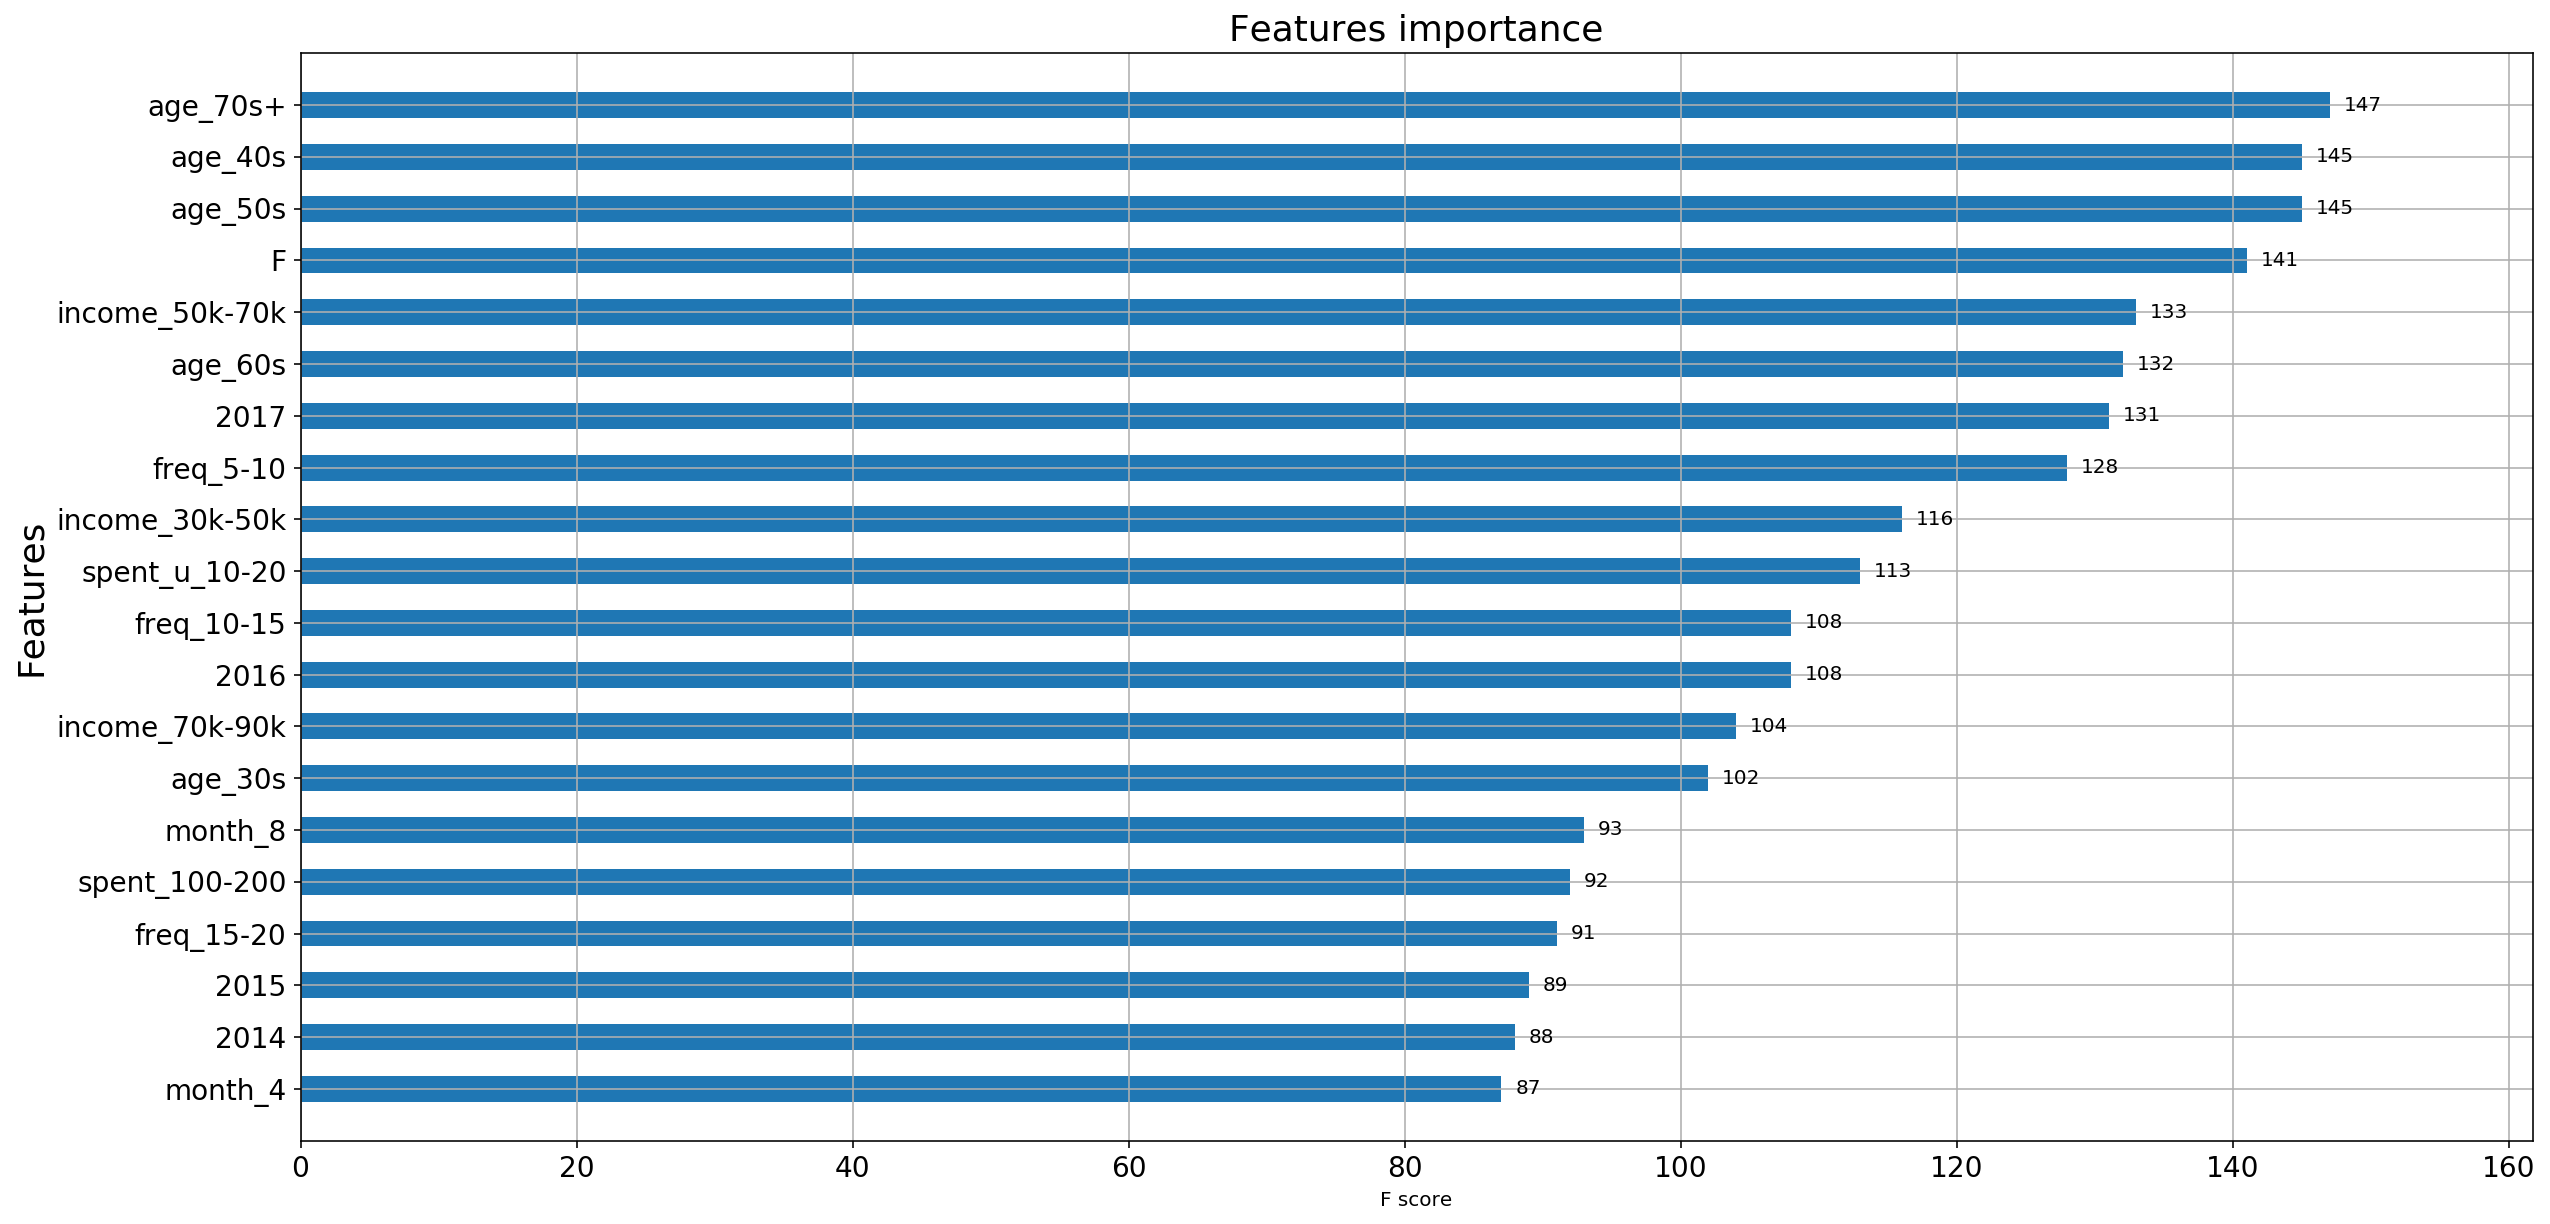

0.6248502456499127
{}
PR AUC: 0.22498779036194708

              precision    recall  f1-score   support

     class 0       0.90      0.55      0.68      1003
     class 1       0.20      0.66      0.31       174

    accuracy                           0.56      1177
   macro avg       0.55      0.60      0.49      1177
weighted avg       0.80      0.56      0.63      1177



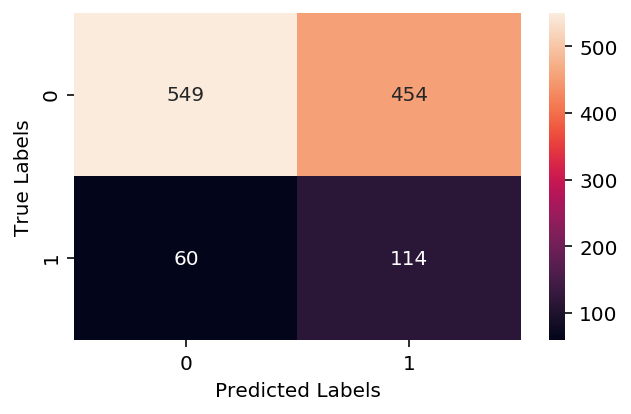

In [8]:
m.plot_feature_importance(X_train, y_train)
clf = m.grid_search(X_train, y_train)
m.evaluate_test_dataset(X_test, y_test, clf)

### offer 3

1. Fit the 4 base model and print the cross validated roc_auc score, PR auc score, and plot the recall 
2. check the two methods to deal with imbalanced dataset

class 0 to class 1 ratio 5.746559633027523
The numbers of class 1 is  698 numbers of class 0 is 4008
************************************************************

Training XGBClassifier :
XGBClassifier
Time taken : 3.61 secs
roc_auc_weighted : 0.6257819622517095
PR AUC: 0.21508065446835656


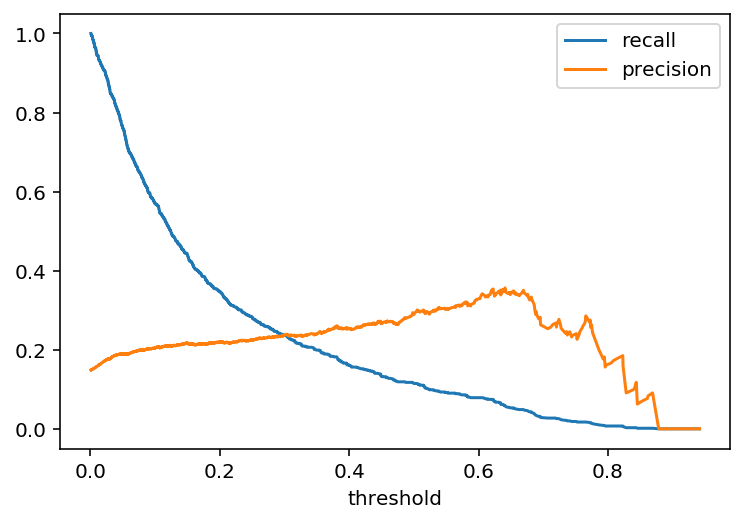

********************
Training RandomForestClassifier :
RandomForestClassifier
Time taken : 4.98 secs
roc_auc_weighted : 0.625944693407281
PR AUC: 0.21048647168413417


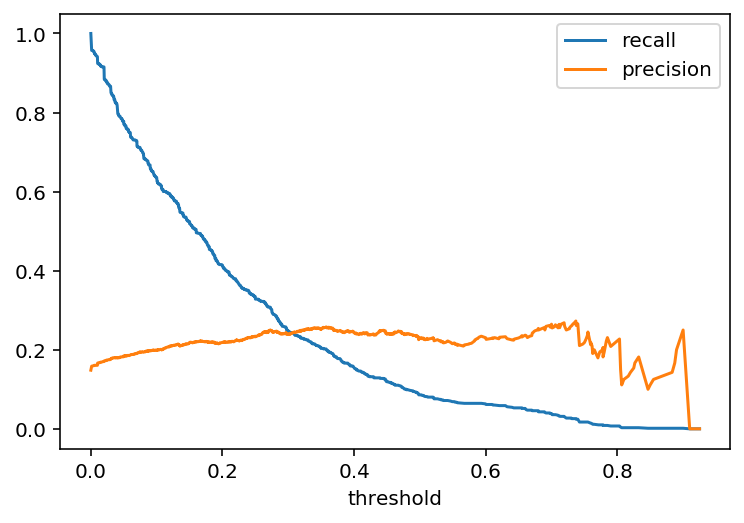

********************
Training AdaBoostClassifier :
AdaBoostClassifier
Time taken : 2.16 secs
roc_auc_weighted : 0.6687064559080598
PR AUC: 0.24342934170795433


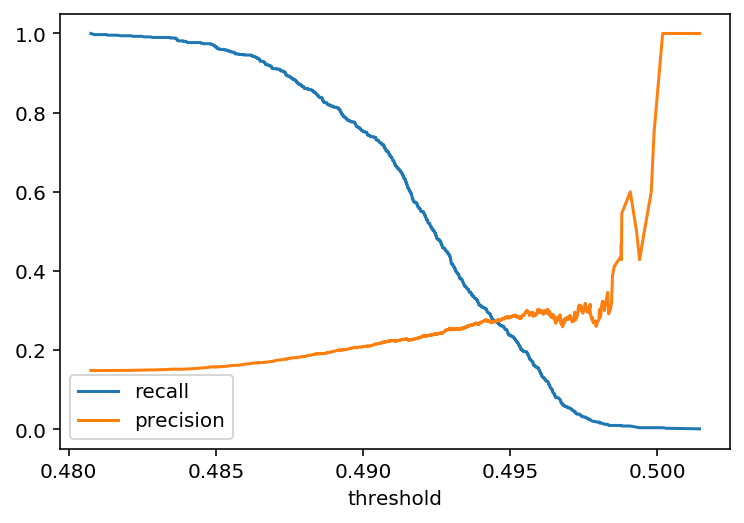

********************
With over sampling:****************************************
Training Pipeline :
Pipeline
Time taken : 6.47 secs
roc_auc_weighted : 0.6266754516927534
PR AUC: 0.21498589425692502


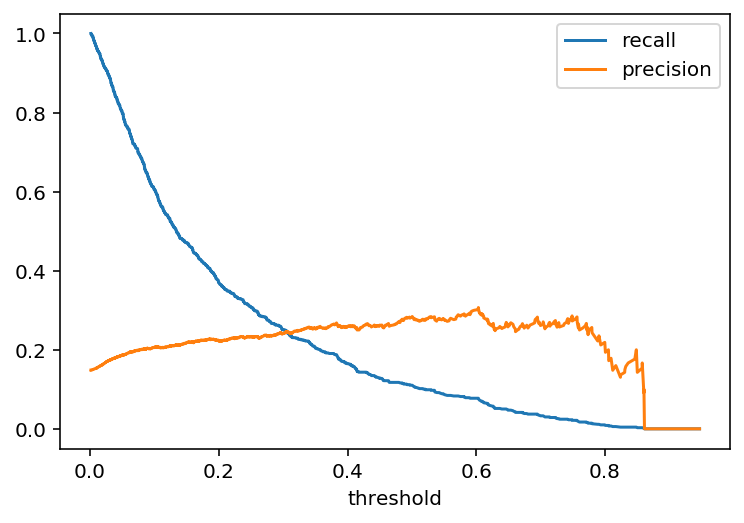

********************
Changing the class weighting hyperparameters:****************************************
Training XGBClassifier :
XGBClassifier
Time taken : 3.79 secs
roc_auc_weighted : 0.6165270314073543
PR AUC: 0.21135751270237016


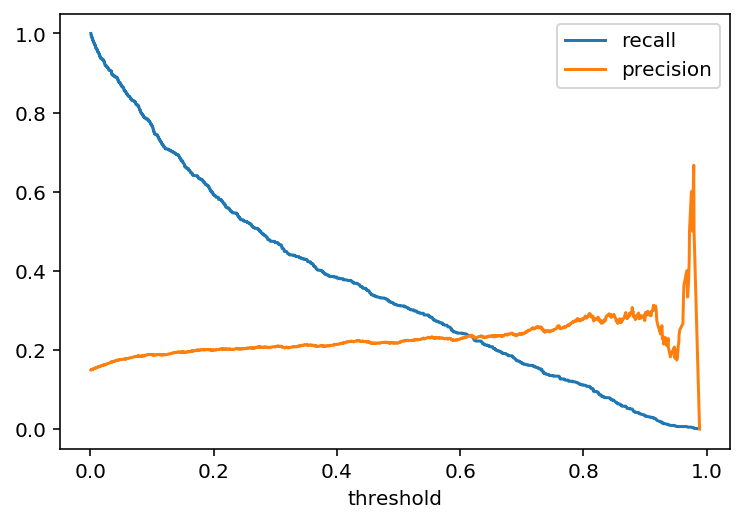

********************


In [9]:
X_train, X_test, y_train, y_test = m.generate_offer_data(data, 3)
m.try_base_models(X_train, y_train, 'roc_auc_ovr_weighted')
m.try_over_sample_and_changing_class_weight('XGBClassifier', X_train, y_train)

Plot the feature importance and evaluate the model performance in the test_dataset

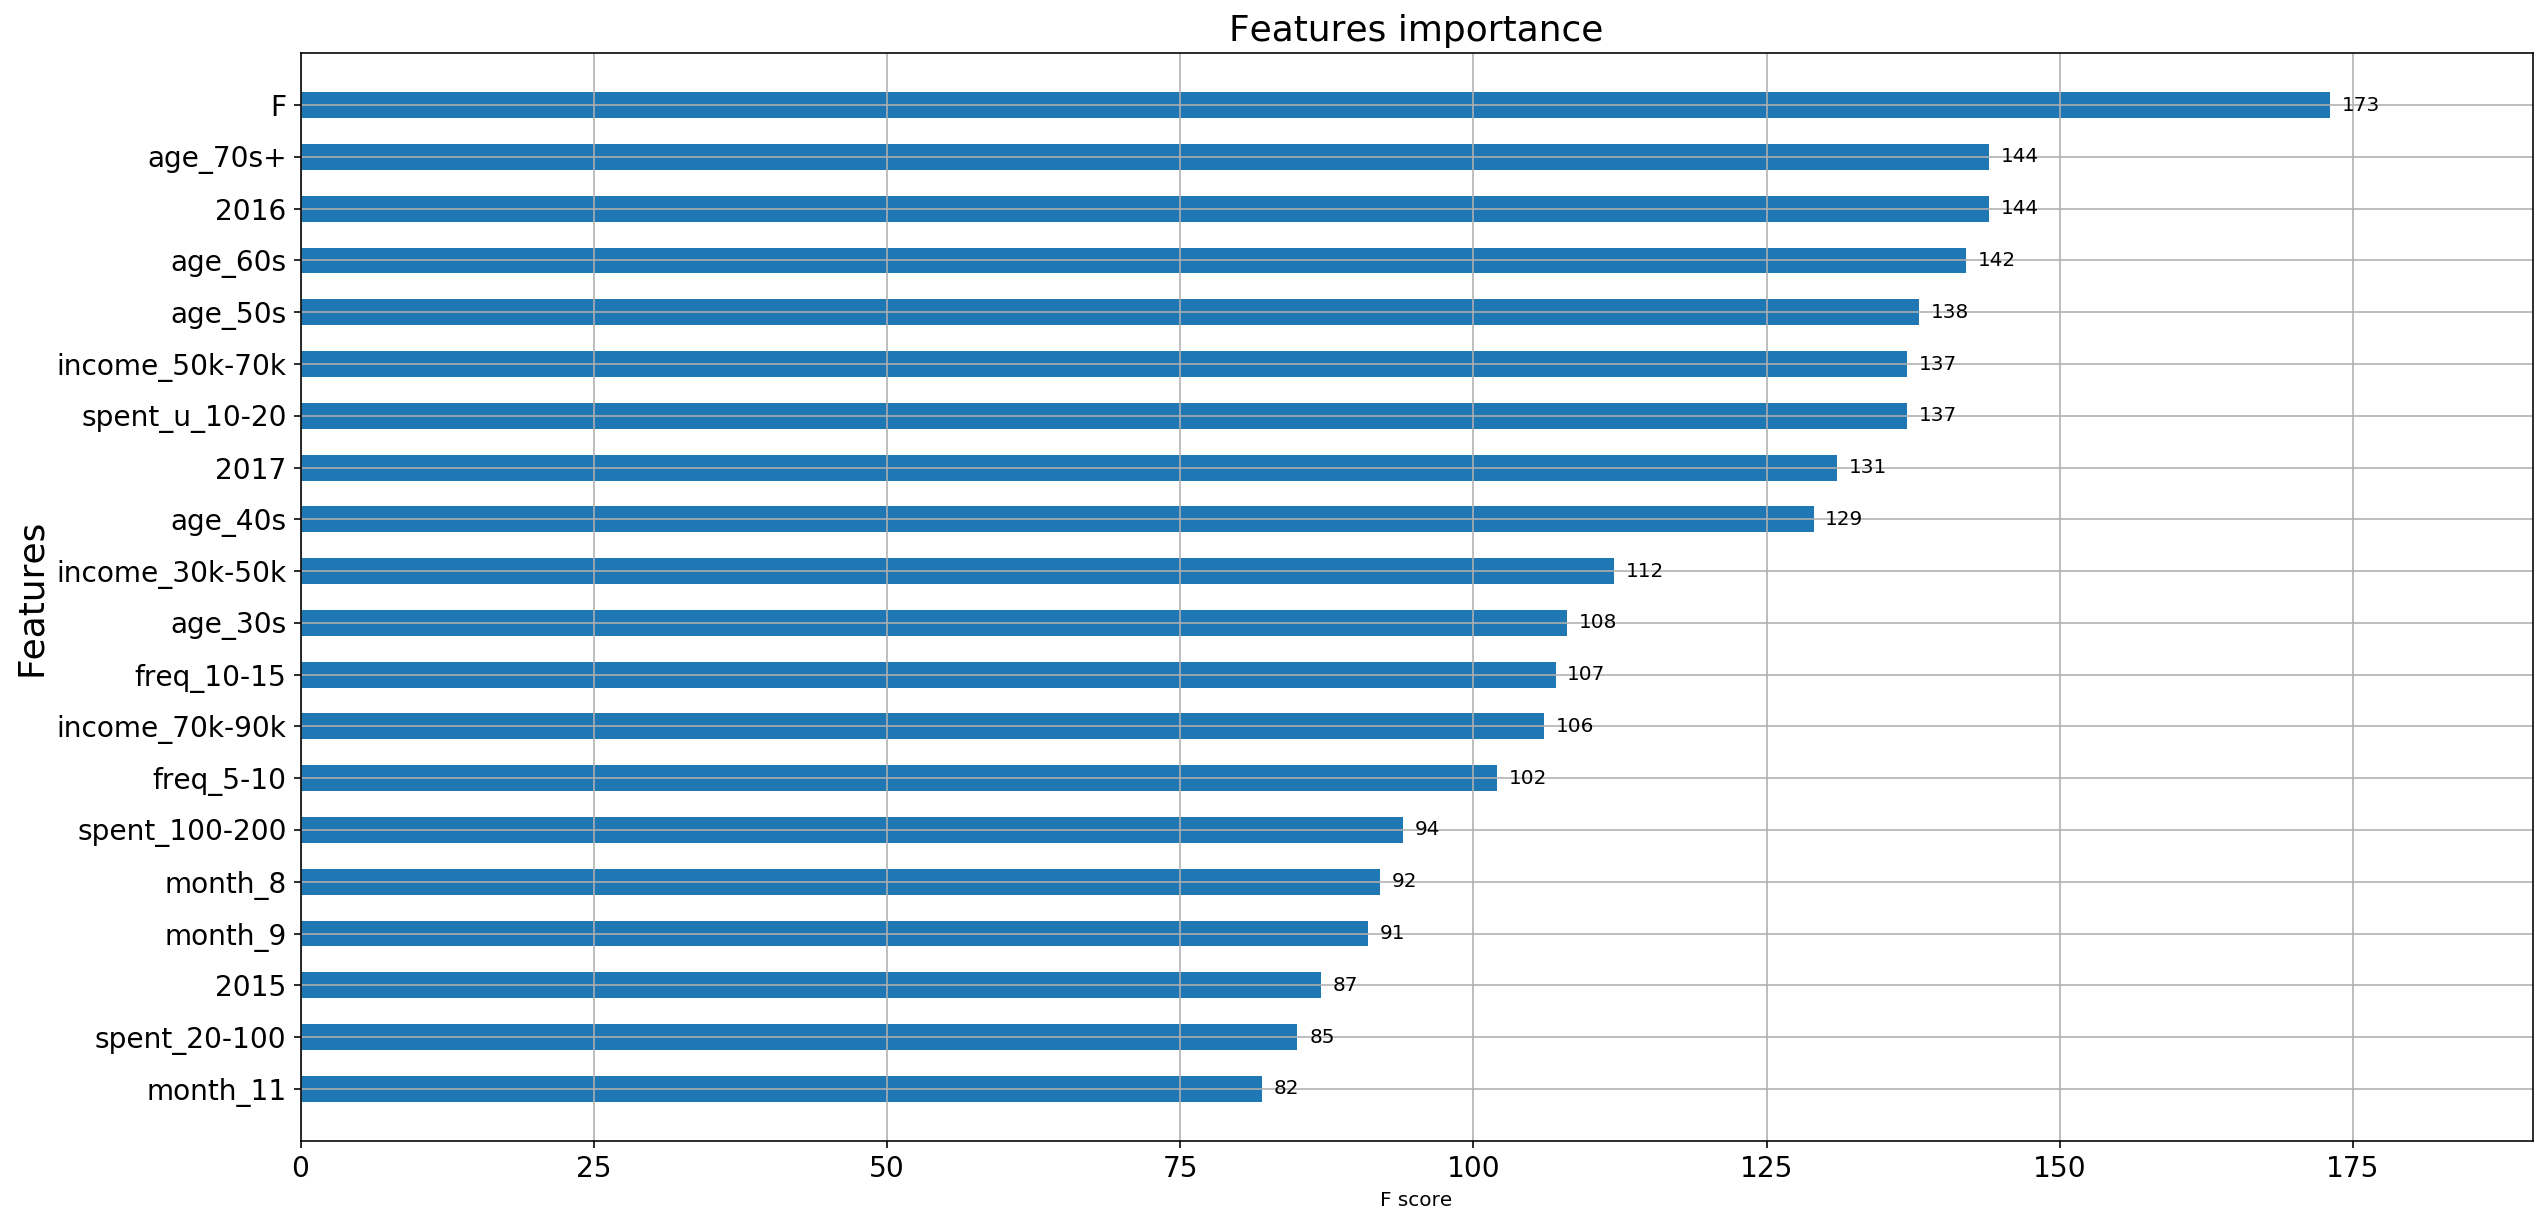

0.6266754516927534
{}
PR AUC: 0.23999538706570528

              precision    recall  f1-score   support

     class 0       0.90      0.58      0.70      1003
     class 1       0.20      0.61      0.30       174

    accuracy                           0.58      1177
   macro avg       0.55      0.60      0.50      1177
weighted avg       0.79      0.58      0.64      1177



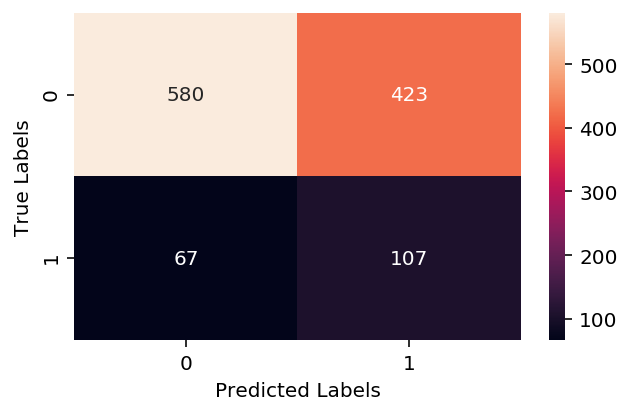

In [10]:
m.plot_feature_importance(X_train, y_train)
clf = m.grid_search(X_train, y_train)
m.evaluate_test_dataset(X_test, y_test, clf)

### offer 4

1. Fit the 4 base model and print the cross validated roc_auc score, PR auc score, and plot the recall 
2. check the two methods to deal with imbalanced dataset

class 0 to class 1 ratio 5.746559633027523
The numbers of class 1 is  698 numbers of class 0 is 4008
************************************************************

Training XGBClassifier :
XGBClassifier
Time taken : 3.56 secs
roc_auc_weighted : 0.6351973309039917
PR AUC: 0.21442091685359654


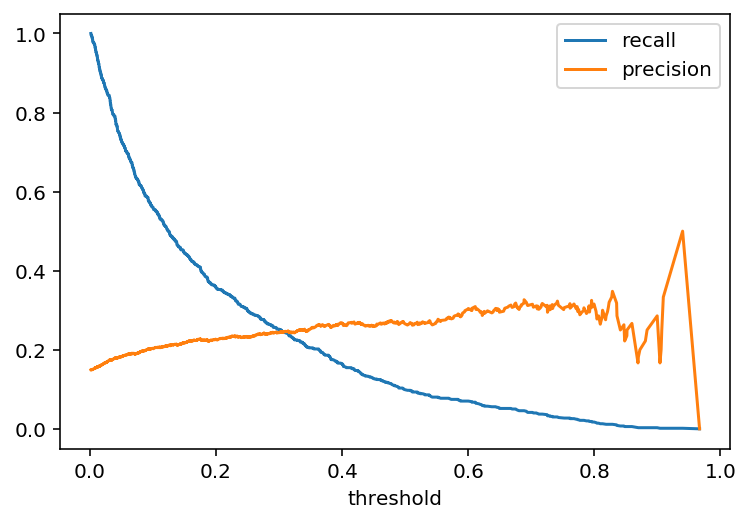

********************
Training RandomForestClassifier :
RandomForestClassifier
Time taken : 4.95 secs
roc_auc_weighted : 0.6463116491538625
PR AUC: 0.21732461607244982


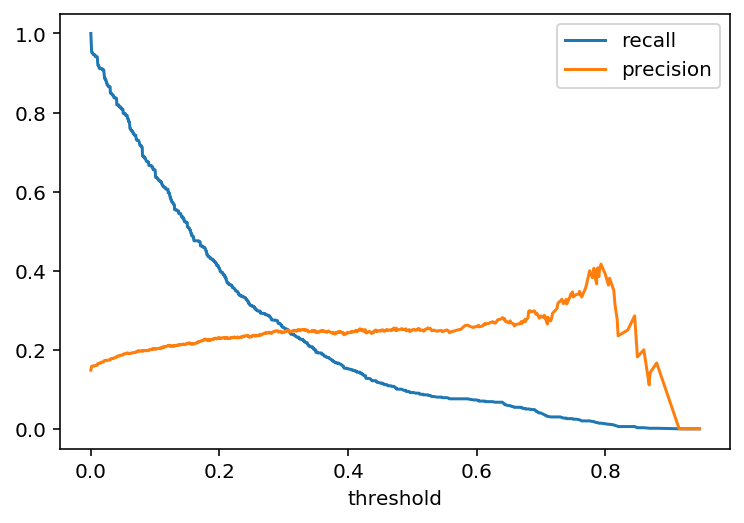

********************
Training AdaBoostClassifier :
AdaBoostClassifier
Time taken : 2.18 secs
roc_auc_weighted : 0.6749095208754987
PR AUC: 0.2364511361339997


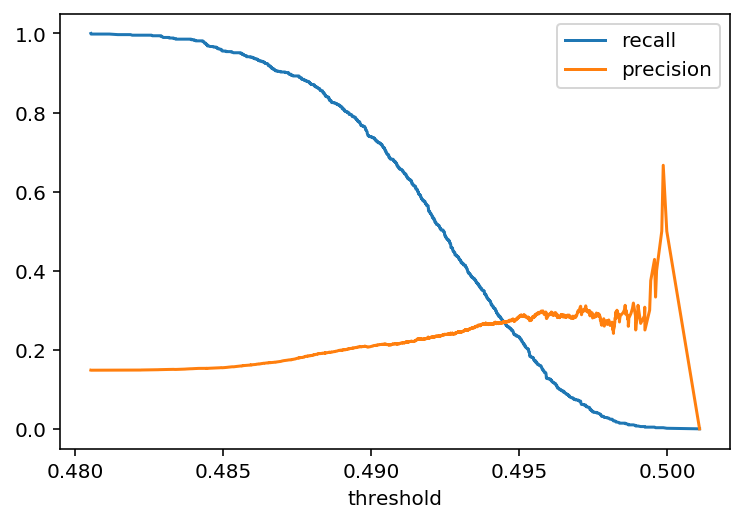

********************
With over sampling:****************************************
Training Pipeline :
Pipeline
Time taken : 6.39 secs
roc_auc_weighted : 0.6380096068341459
PR AUC: 0.22514189410881585


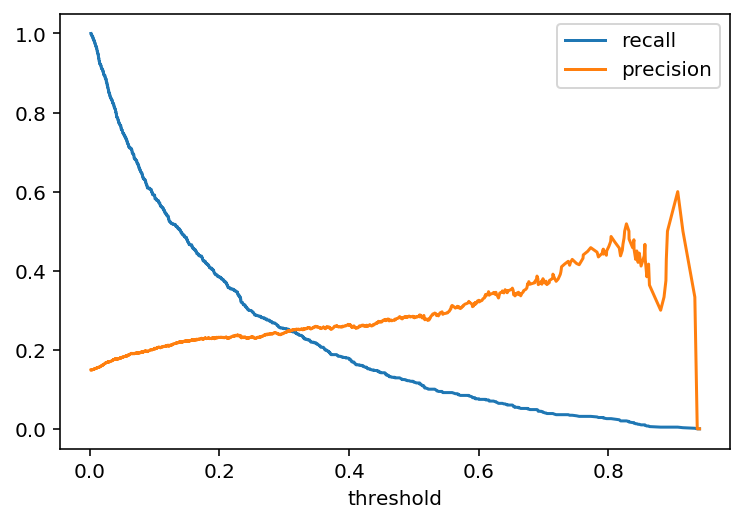

********************
Changing the class weighting hyperparameters:****************************************
Training XGBClassifier :
XGBClassifier
Time taken : 3.76 secs
roc_auc_weighted : 0.6264832397767143
PR AUC: 0.20725918997641218


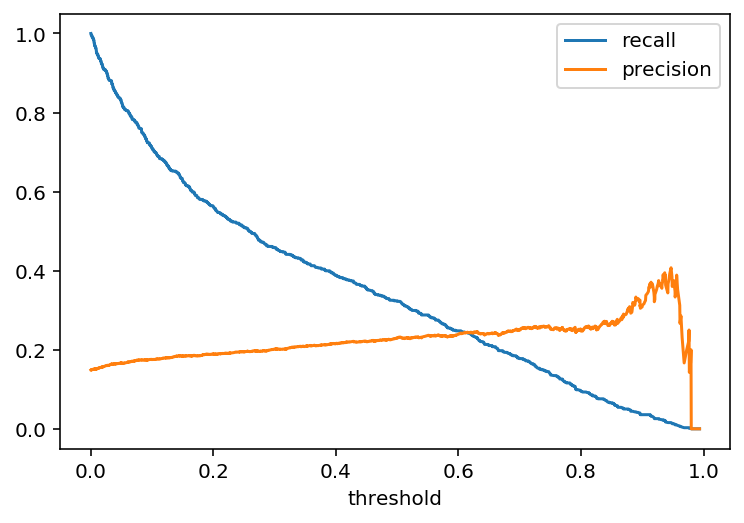

********************


In [11]:
X_train, X_test, y_train, y_test = m.generate_offer_data(data,4)
m.try_base_models(X_train, y_train, 'roc_auc_ovr_weighted')
m.try_over_sample_and_changing_class_weight('XGBClassifier', X_train, y_train)

Plot the feature importance and evaluate the model performance in the test_dataset

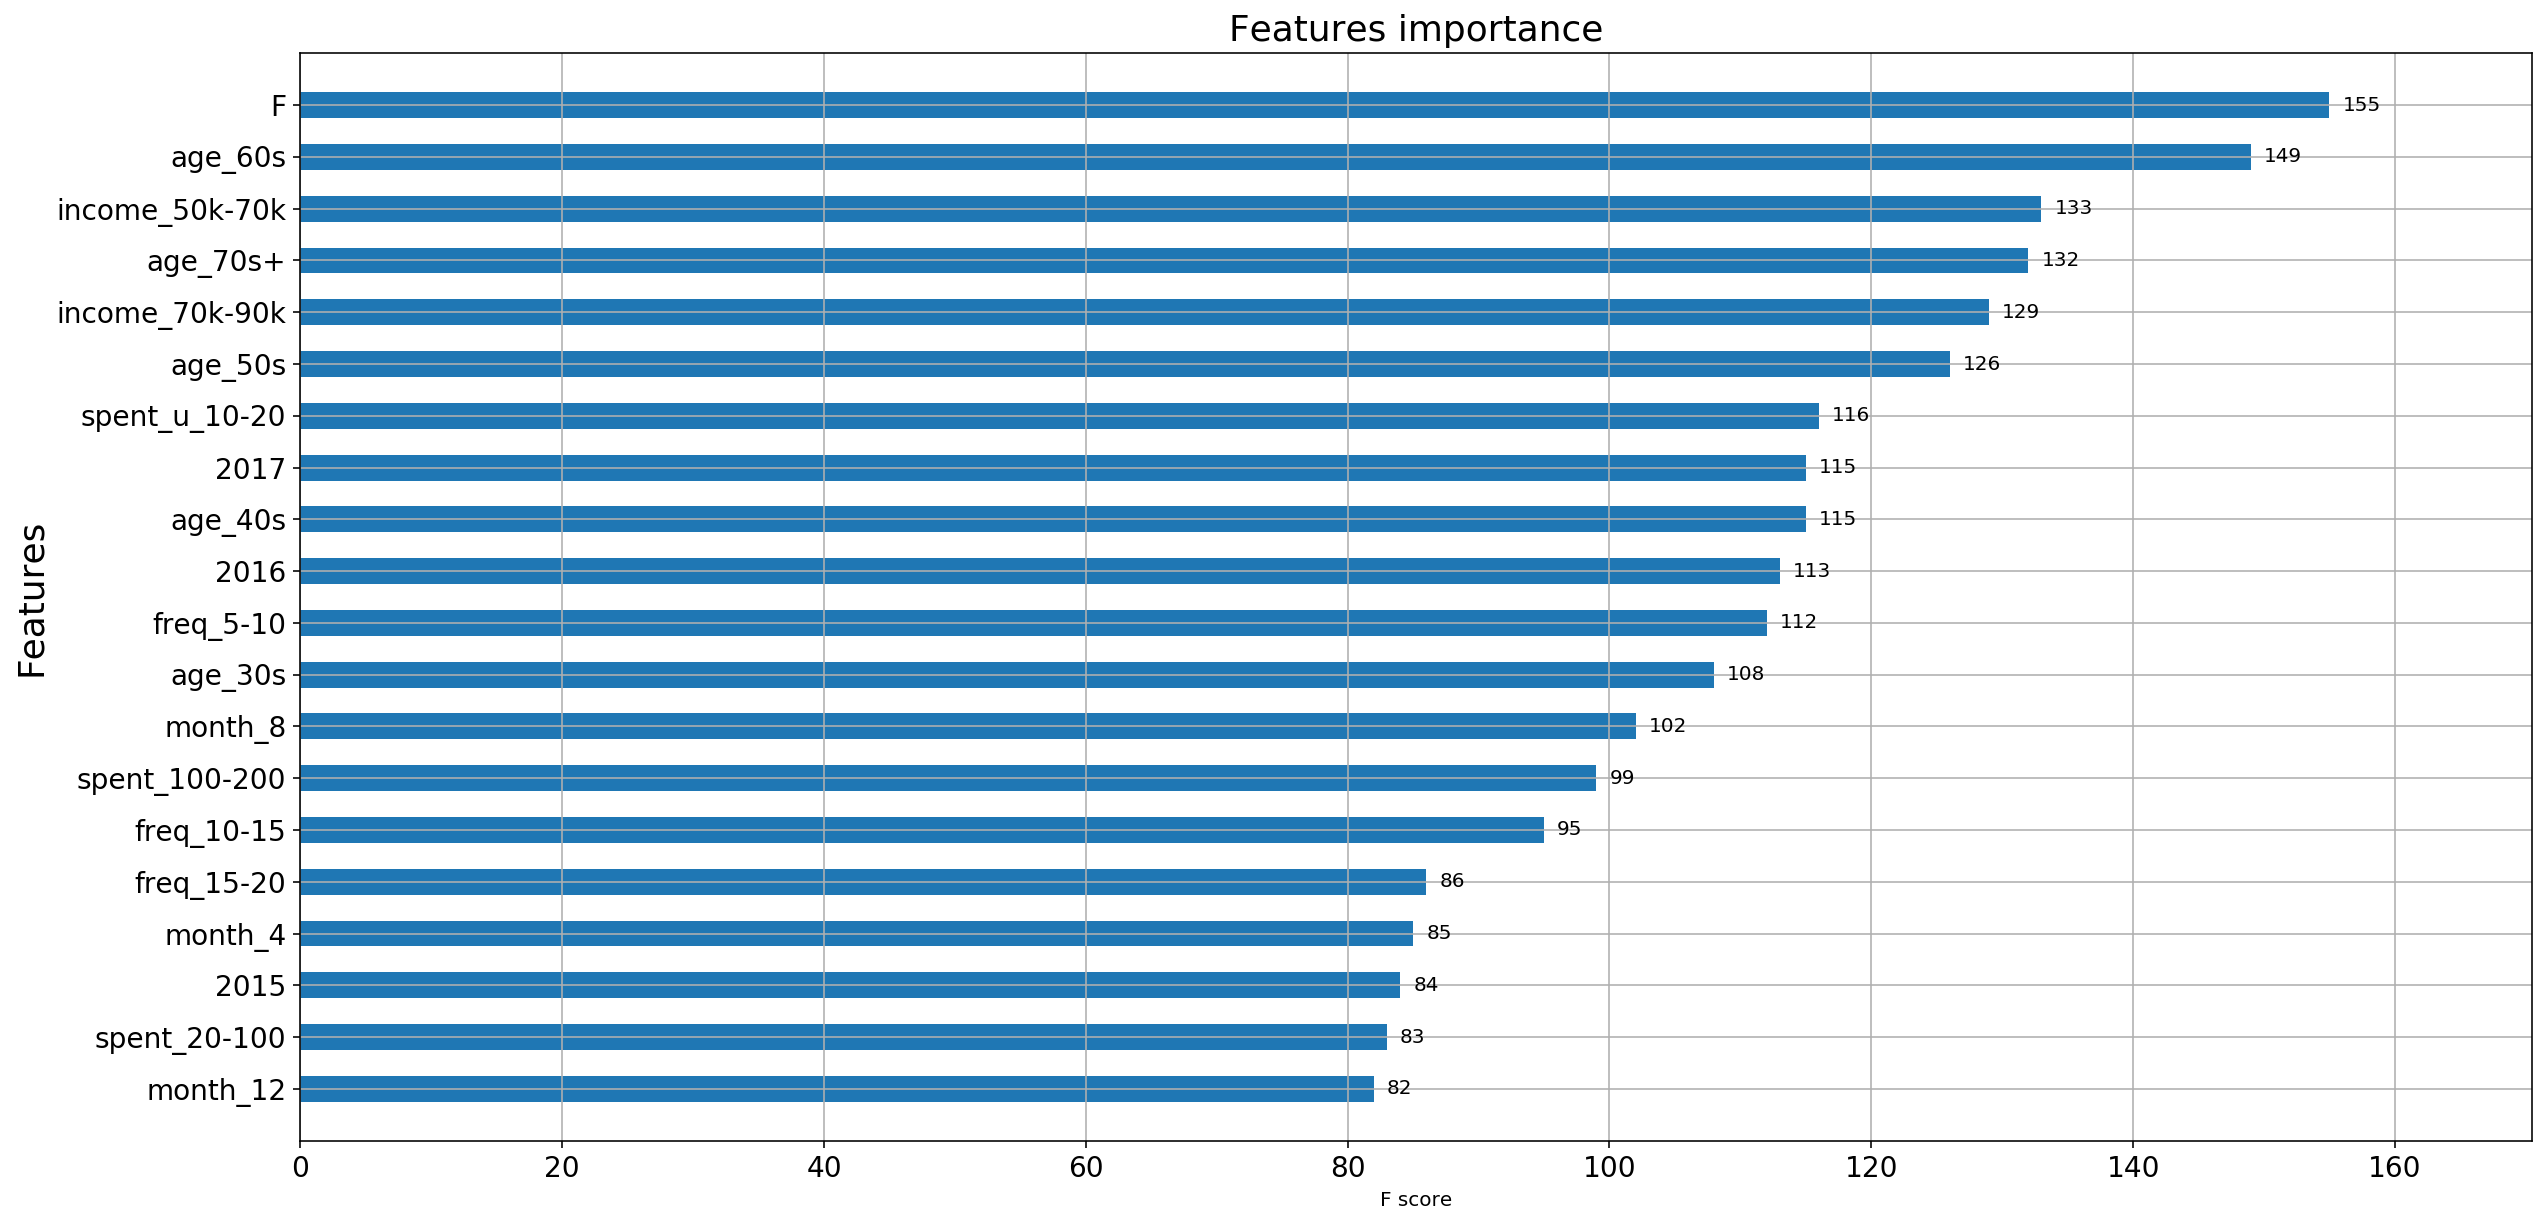

0.6380096068341459
{}
PR AUC: 0.21519958247583434

              precision    recall  f1-score   support

     class 0       0.89      0.57      0.69      1003
     class 1       0.19      0.60      0.29       174

    accuracy                           0.57      1177
   macro avg       0.54      0.58      0.49      1177
weighted avg       0.79      0.57      0.64      1177



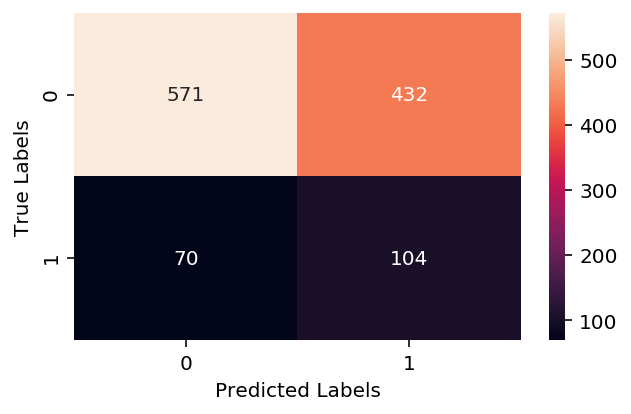

In [12]:
m.plot_feature_importance(X_train, y_train)
clf = m.grid_search(X_train, y_train)
m.evaluate_test_dataset(X_test, y_test, clf)

### offer 5

1. Fit the 4 base model and print the cross validated roc_auc score, PR auc score, and plot the recall 
2. check the two methods to deal with imbalanced dataset

class 0 to class 1 ratio 5.746559633027523
The numbers of class 1 is  698 numbers of class 0 is 4008
************************************************************

Training XGBClassifier :
XGBClassifier
Time taken : 3.58 secs
roc_auc_weighted : 0.6195578028983396
PR AUC: 0.2136507069927862


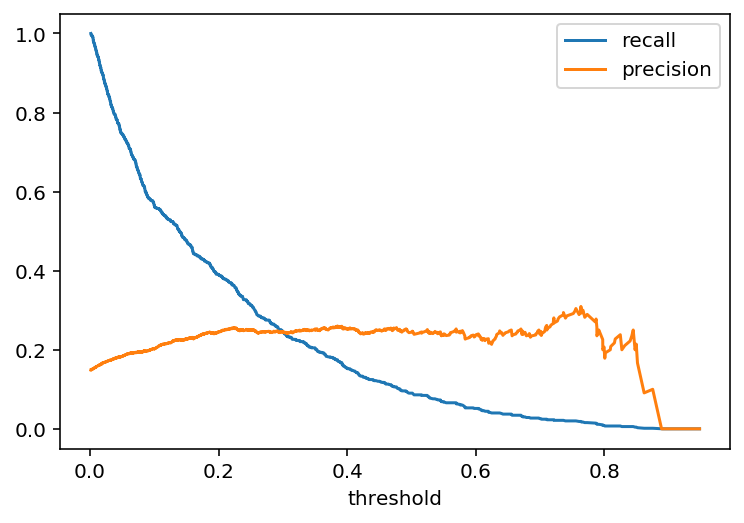

********************
Training RandomForestClassifier :
RandomForestClassifier
Time taken : 4.97 secs
roc_auc_weighted : 0.6299089710831017
PR AUC: 0.2194991881349142


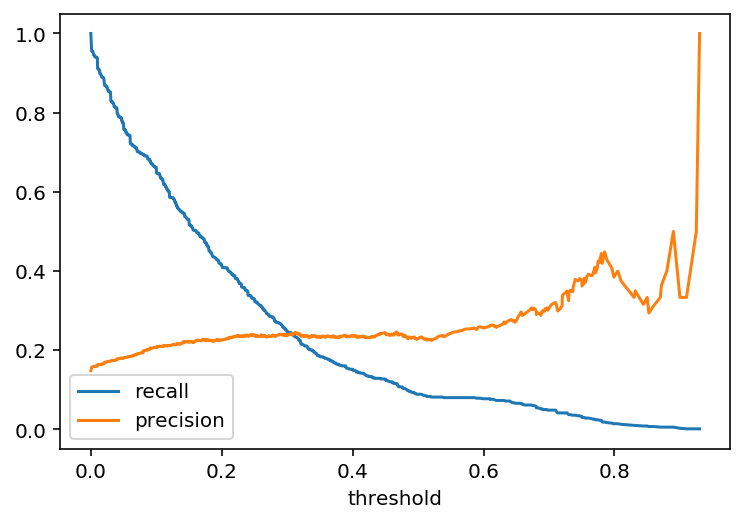

********************
Training AdaBoostClassifier :
AdaBoostClassifier
Time taken : 2.12 secs
roc_auc_weighted : 0.673164238316966
PR AUC: 0.24176302229028712


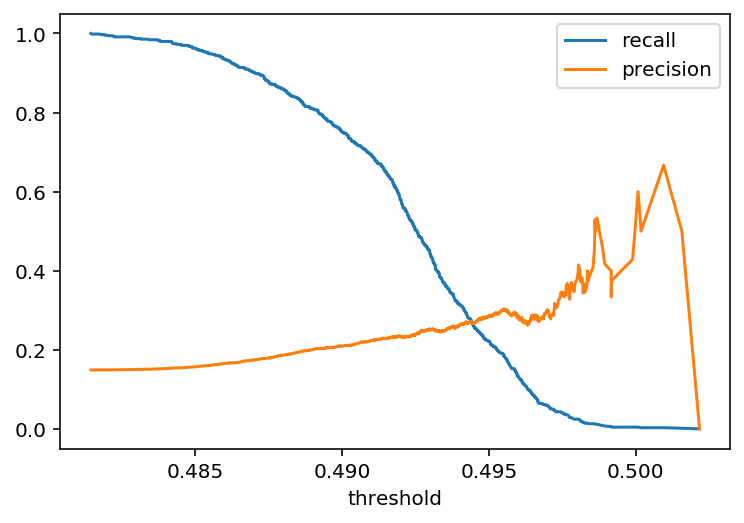

********************
With over sampling:****************************************
Training Pipeline :
Pipeline
Time taken : 6.48 secs
roc_auc_weighted : 0.6255063490120203
PR AUC: 0.21519074157644164


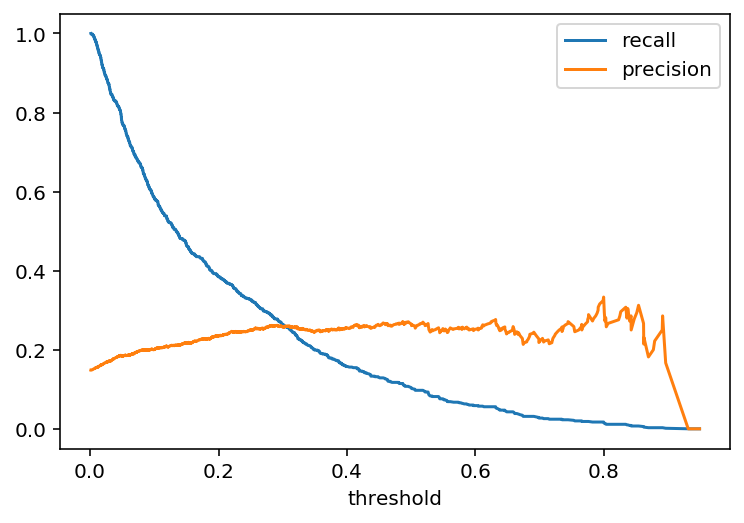

********************
Changing the class weighting hyperparameters:****************************************
Training XGBClassifier :
XGBClassifier
Time taken : 3.81 secs
roc_auc_weighted : 0.6093905223107392
PR AUC: 0.20723964912579754


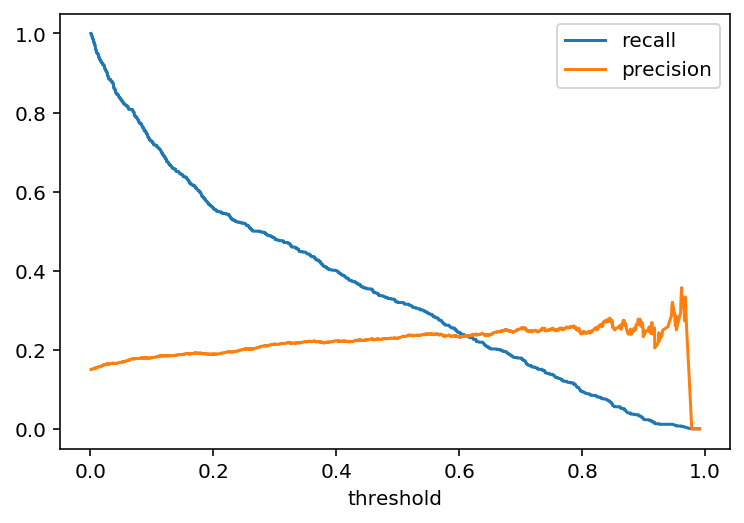

********************


In [13]:
X_train, X_test, y_train, y_test = m.generate_offer_data(data, 5)
m.try_base_models(X_train, y_train, 'roc_auc_ovr_weighted')
m.try_over_sample_and_changing_class_weight('XGBClassifier', X_train, y_train)

Plot the feature importance and evaluate the model performance in the test_dataset

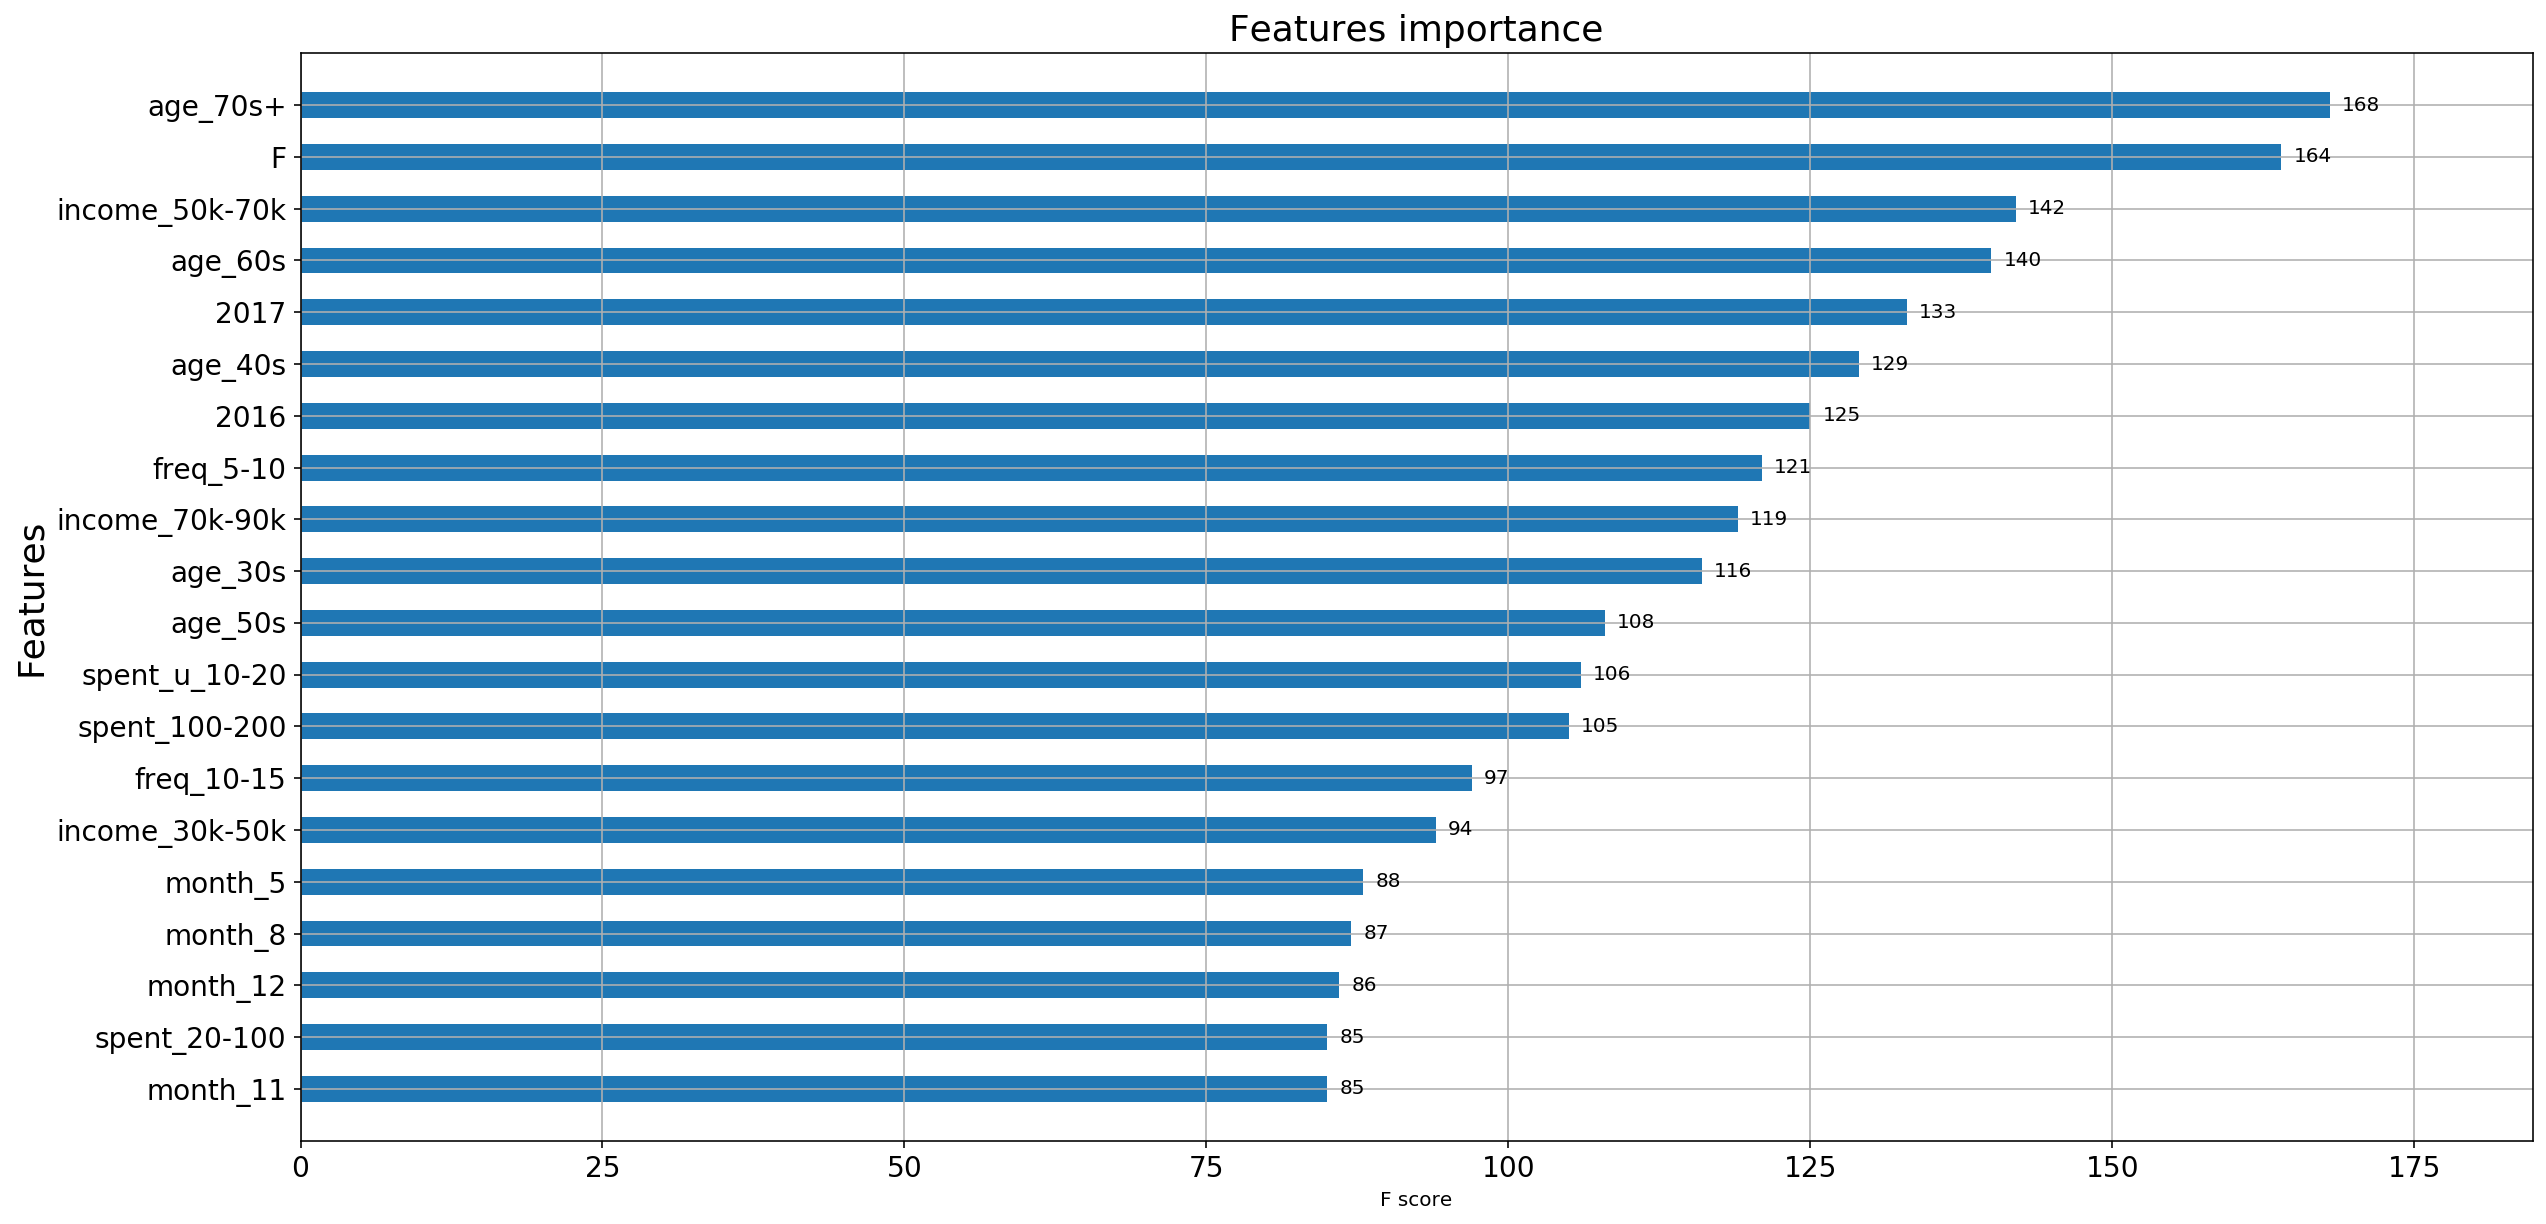

0.6255063490120203
{}
PR AUC: 0.20574581819678522

              precision    recall  f1-score   support

     class 0       0.88      0.56      0.68      1003
     class 1       0.19      0.58      0.28       174

    accuracy                           0.56      1177
   macro avg       0.53      0.57      0.48      1177
weighted avg       0.78      0.56      0.62      1177



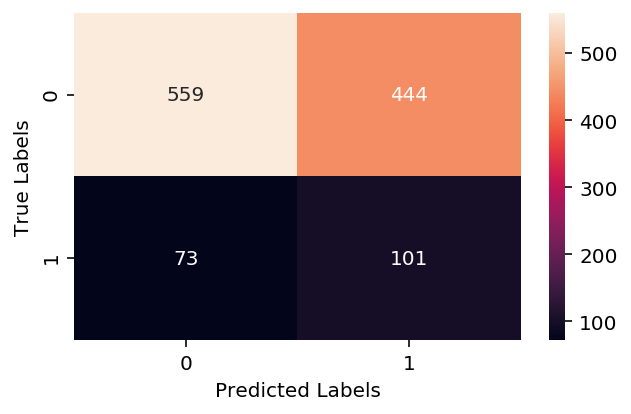

In [14]:
m.plot_feature_importance(X_train, y_train)
clf = m.grid_search(X_train, y_train)
m.evaluate_test_dataset(X_test, y_test, clf)

### offer 6

1. Fit the 4 base model and print the cross validated roc_auc score, PR auc score, and plot the recall 
2. check the two methods to deal with imbalanced dataset

class 0 to class 1 ratio 5.746559633027523
The numbers of class 1 is  698 numbers of class 0 is 4008
************************************************************

Training XGBClassifier :
XGBClassifier
Time taken : 3.55 secs
roc_auc_weighted : 0.6465669899857979
PR AUC: 0.21795326508750856


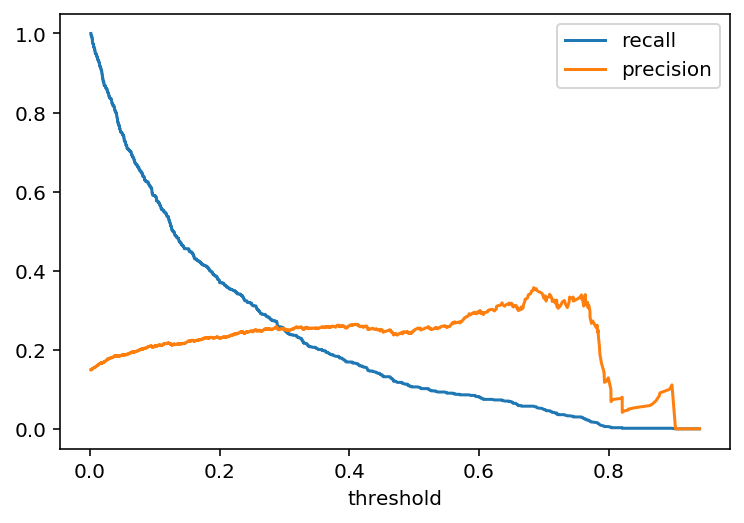

********************
Training RandomForestClassifier :
RandomForestClassifier
Time taken : 4.97 secs
roc_auc_weighted : 0.6480549044950844
PR AUC: 0.21237733411199455


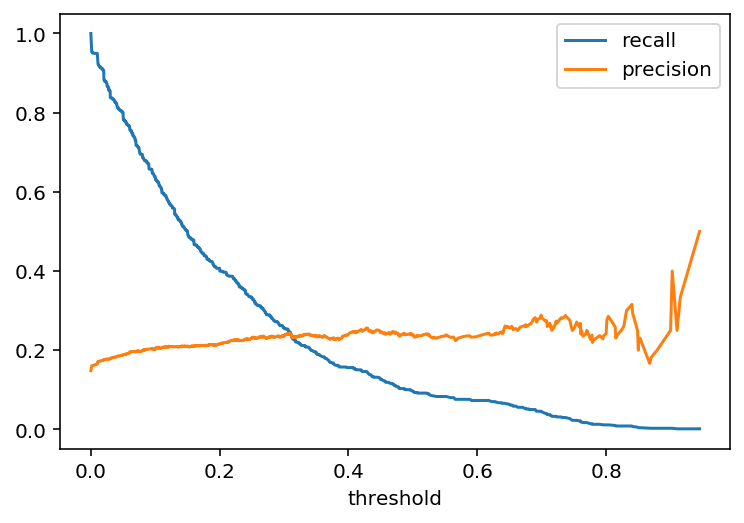

********************
Training AdaBoostClassifier :
AdaBoostClassifier
Time taken : 2.16 secs
roc_auc_weighted : 0.6869482347645485
PR AUC: 0.25218356634999095


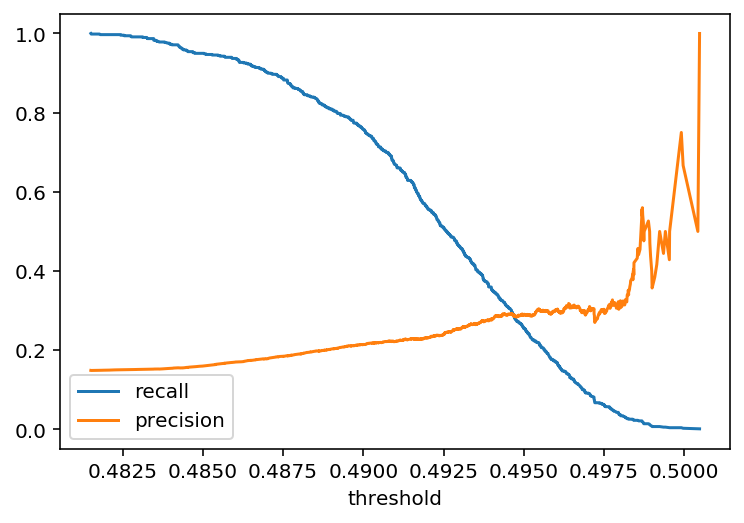

********************
With over sampling:****************************************
Training Pipeline :
Pipeline
Time taken : 6.35 secs
roc_auc_weighted : 0.6493670636663142
PR AUC: 0.2196481416301919


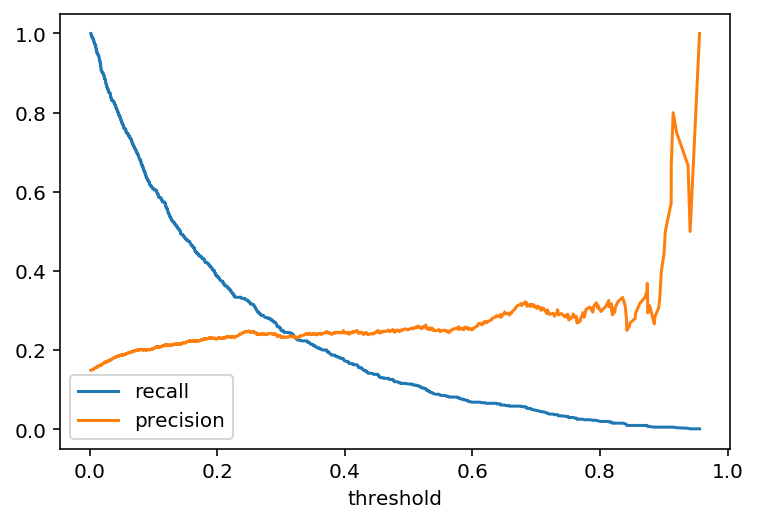

********************
Changing the class weighting hyperparameters:****************************************
Training XGBClassifier :
XGBClassifier
Time taken : 3.73 secs
roc_auc_weighted : 0.6370079874984743
PR AUC: 0.2118738853090257


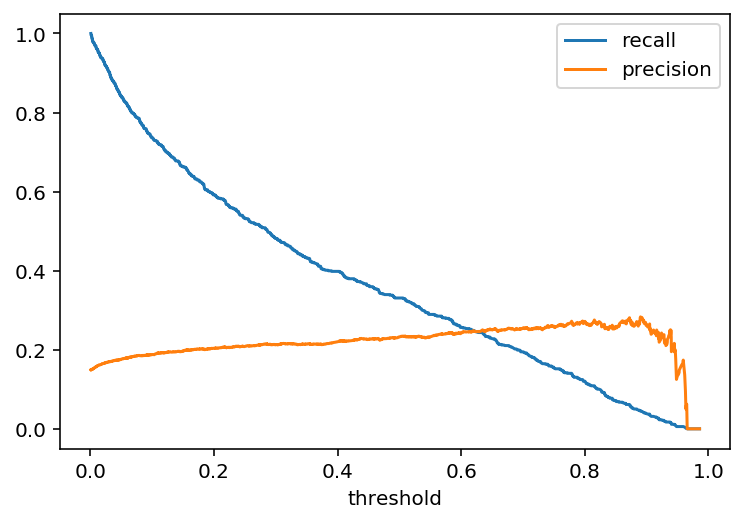

********************


In [15]:
X_train, X_test, y_train, y_test = m.generate_offer_data(data, 6)
m.try_base_models(X_train, y_train, 'roc_auc_ovr_weighted')
m.try_over_sample_and_changing_class_weight('XGBClassifier', X_train, y_train)

Plot the feature importance and evaluate the model performance in the test_dataset

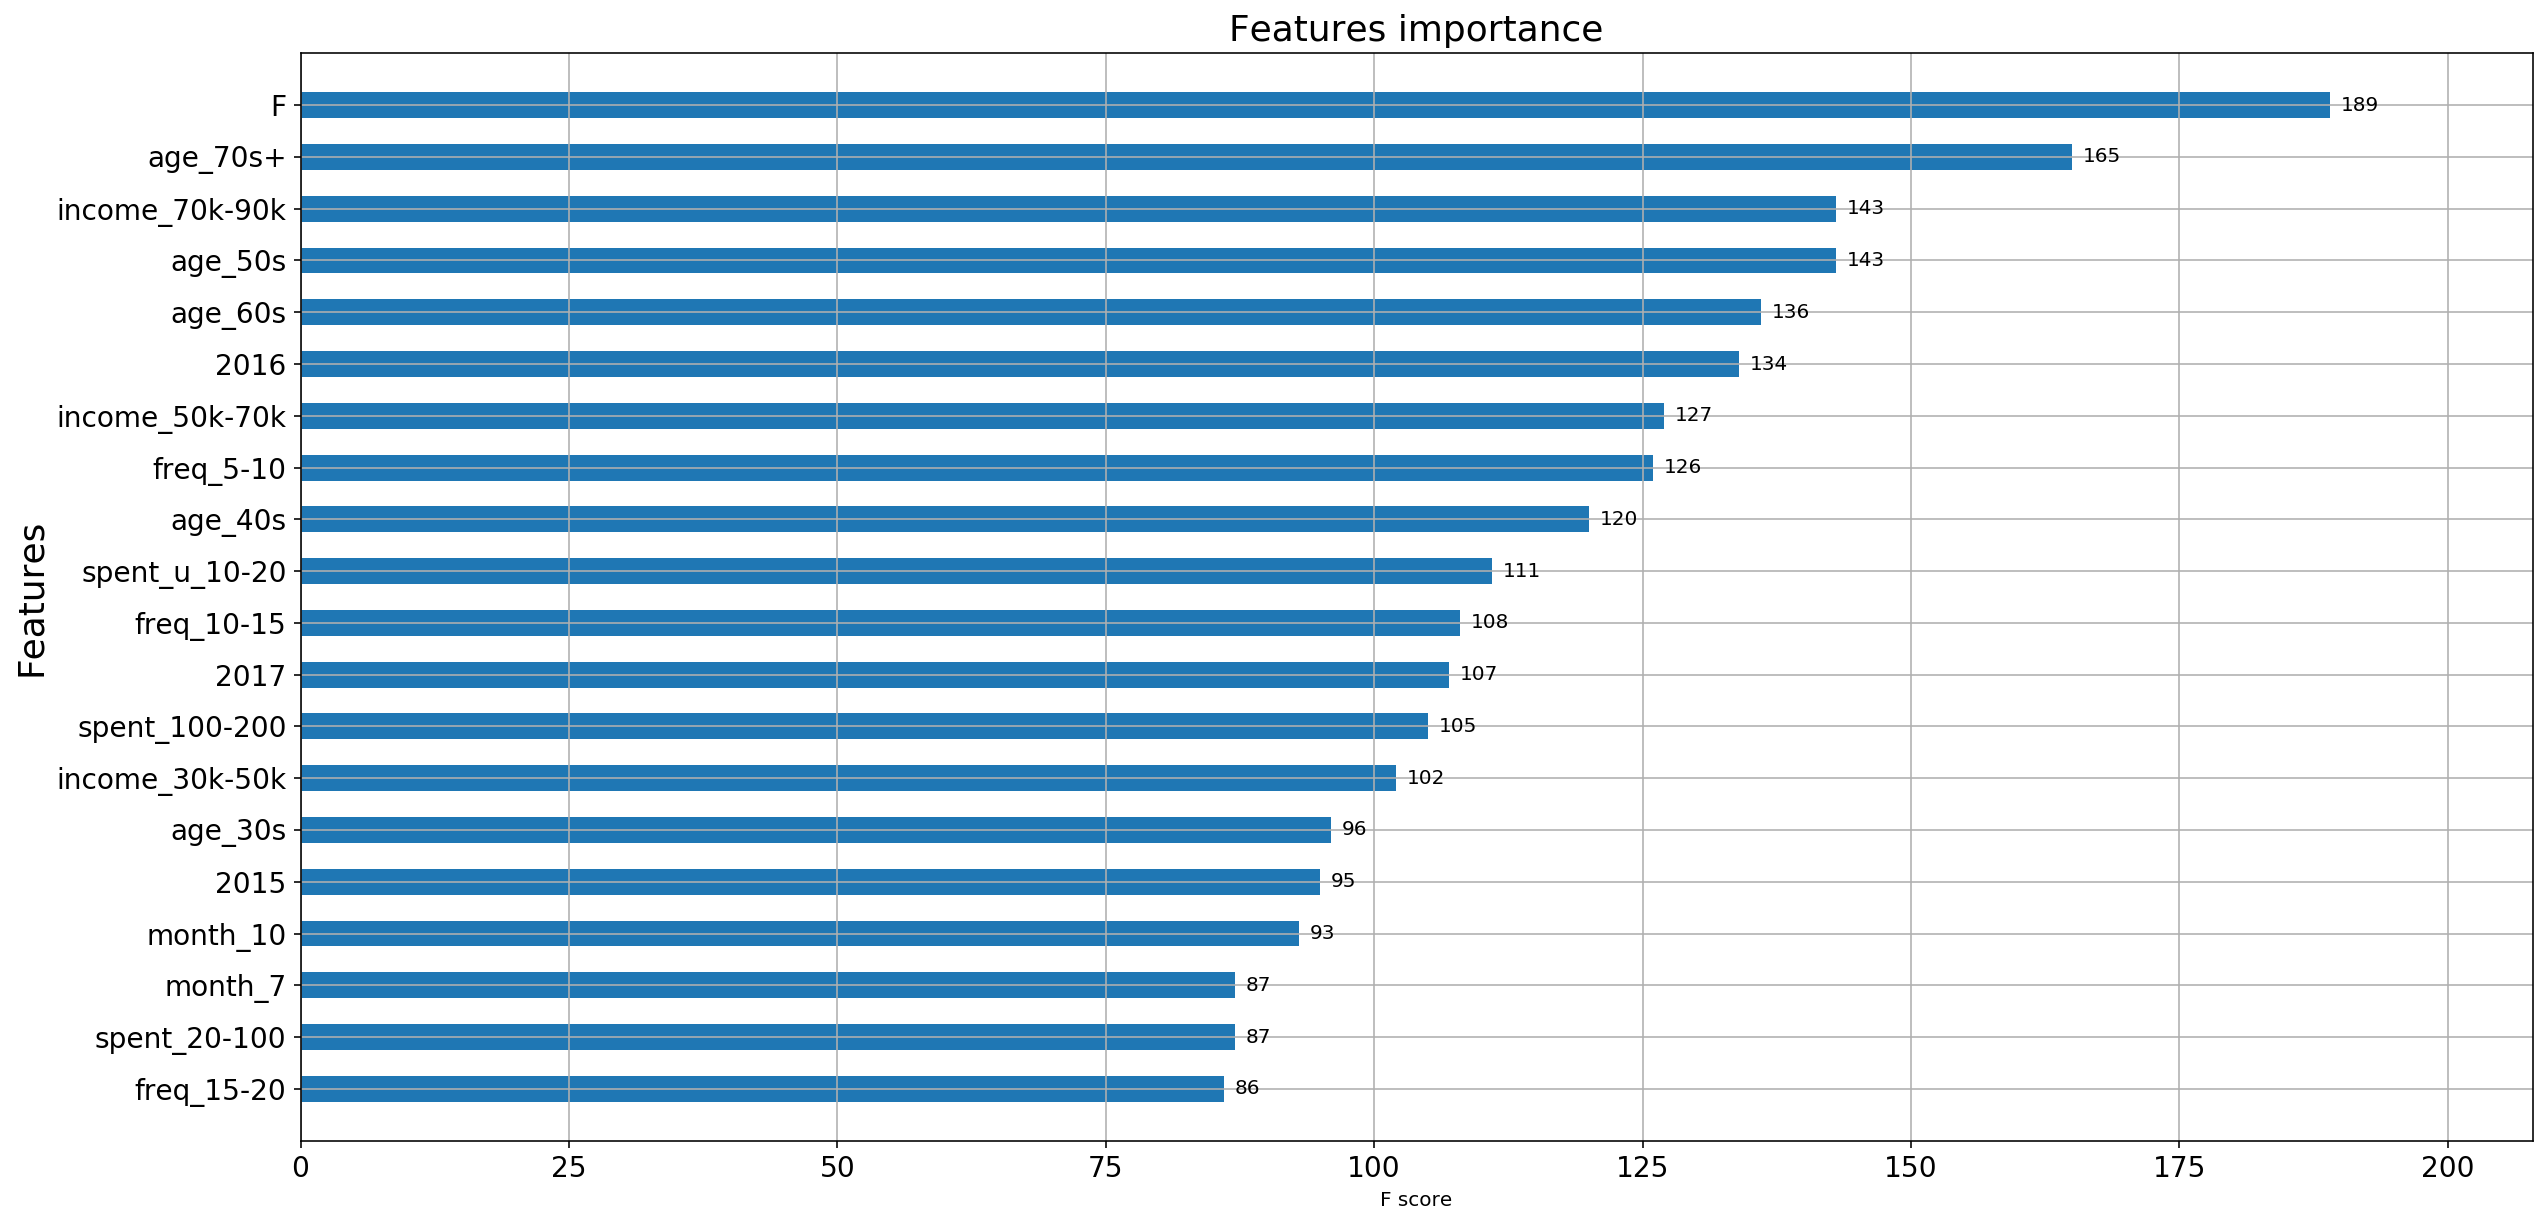

0.6493670636663142
{}
PR AUC: 0.2149257239240658

              precision    recall  f1-score   support

     class 0       0.88      0.56      0.69      1003
     class 1       0.19      0.57      0.28       174

    accuracy                           0.56      1177
   macro avg       0.54      0.57      0.48      1177
weighted avg       0.78      0.56      0.63      1177



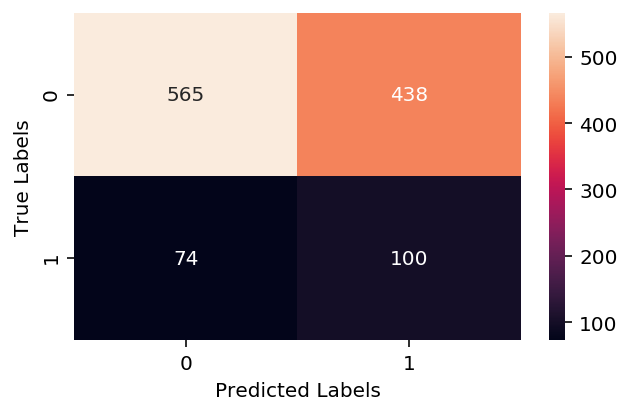

In [16]:
m.plot_feature_importance(X_train, y_train)
clf = m.grid_search(X_train, y_train)
m.evaluate_test_dataset(X_test, y_test, clf)

### offer 7

1. Fit the 4 base model and print the cross validated roc_auc score, PR auc score, and plot the recall 
2. check the two methods to deal with imbalanced dataset

class 0 to class 1 ratio 5.746559633027523
The numbers of class 1 is  698 numbers of class 0 is 4008
************************************************************

Training XGBClassifier :
XGBClassifier
Time taken : 3.53 secs
roc_auc_weighted : 0.641293682100655
PR AUC: 0.22037607857586633


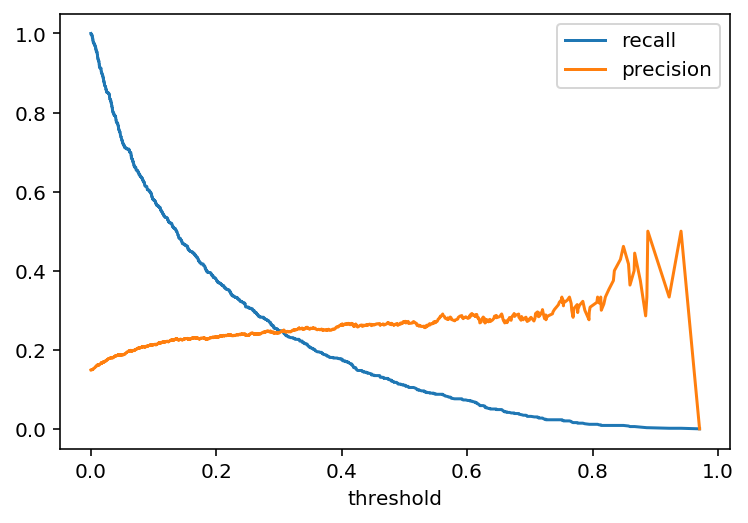

********************
Training RandomForestClassifier :
RandomForestClassifier
Time taken : 4.88 secs
roc_auc_weighted : 0.6424395410853094
PR AUC: 0.21327246134608005


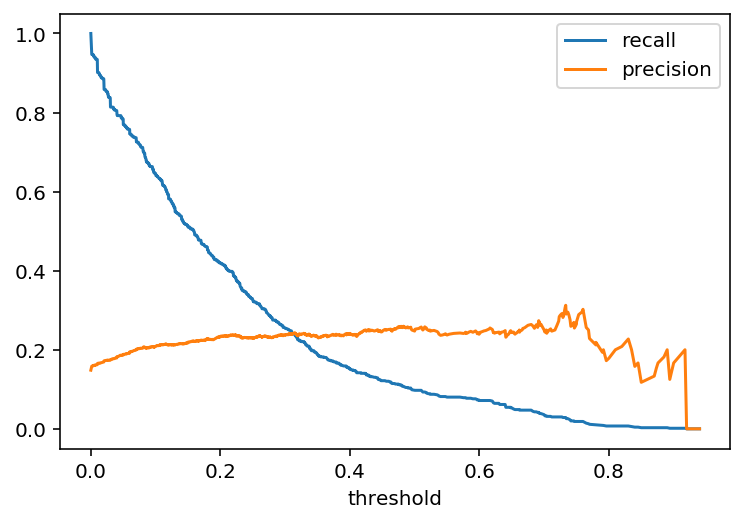

********************
Training AdaBoostClassifier :
AdaBoostClassifier
Time taken : 2.13 secs
roc_auc_weighted : 0.6819058337880891
PR AUC: 0.24866722917337525


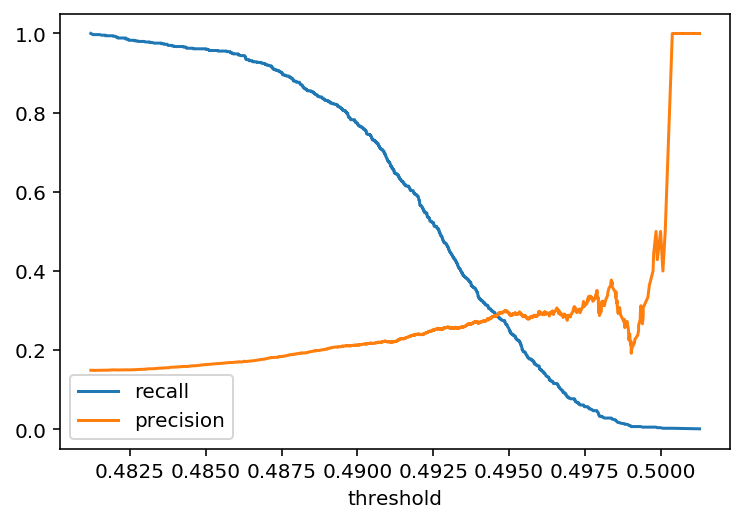

********************
With over sampling:****************************************
Training Pipeline :
Pipeline
Time taken : 6.64 secs
roc_auc_weighted : 0.6419921635639803
PR AUC: 0.21904314673304703


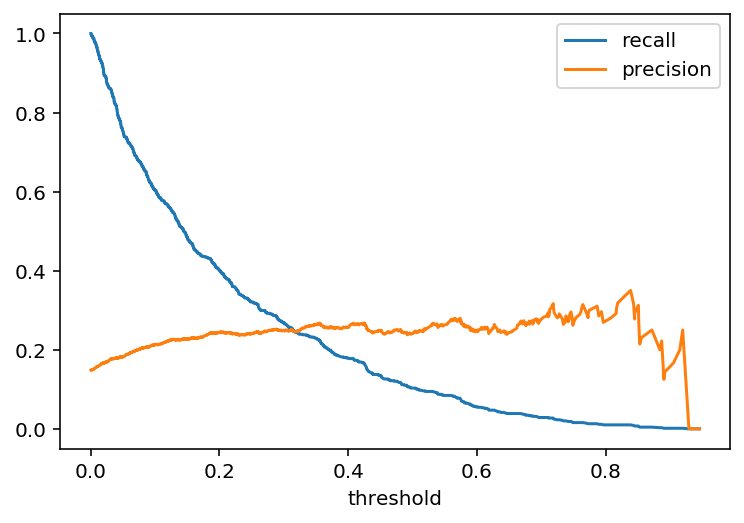

********************
Changing the class weighting hyperparameters:****************************************
Training XGBClassifier :
XGBClassifier
Time taken : 3.76 secs
roc_auc_weighted : 0.6309951718851853
PR AUC: 0.21633367528046016


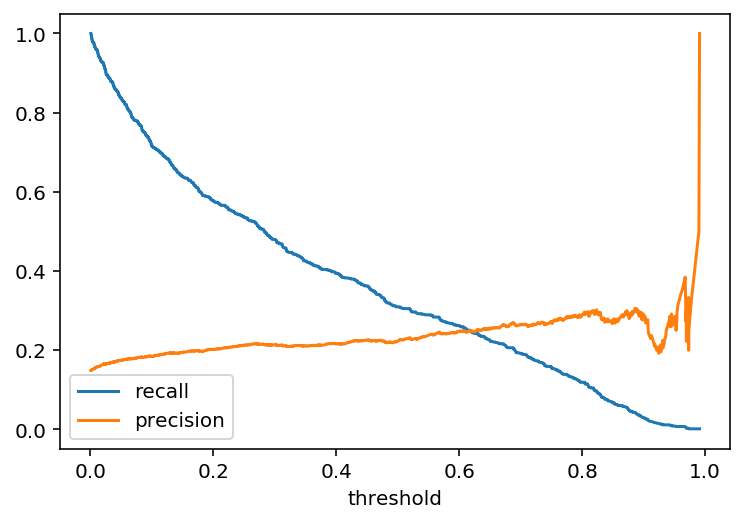

********************


In [17]:
X_train, X_test, y_train, y_test = m.generate_offer_data(data, 7)
m.try_base_models(X_train, y_train, 'roc_auc_ovr_weighted')
m.try_over_sample_and_changing_class_weight('XGBClassifier', X_train, y_train)

Plot the feature importance and evaluate the model performance in the test_dataset

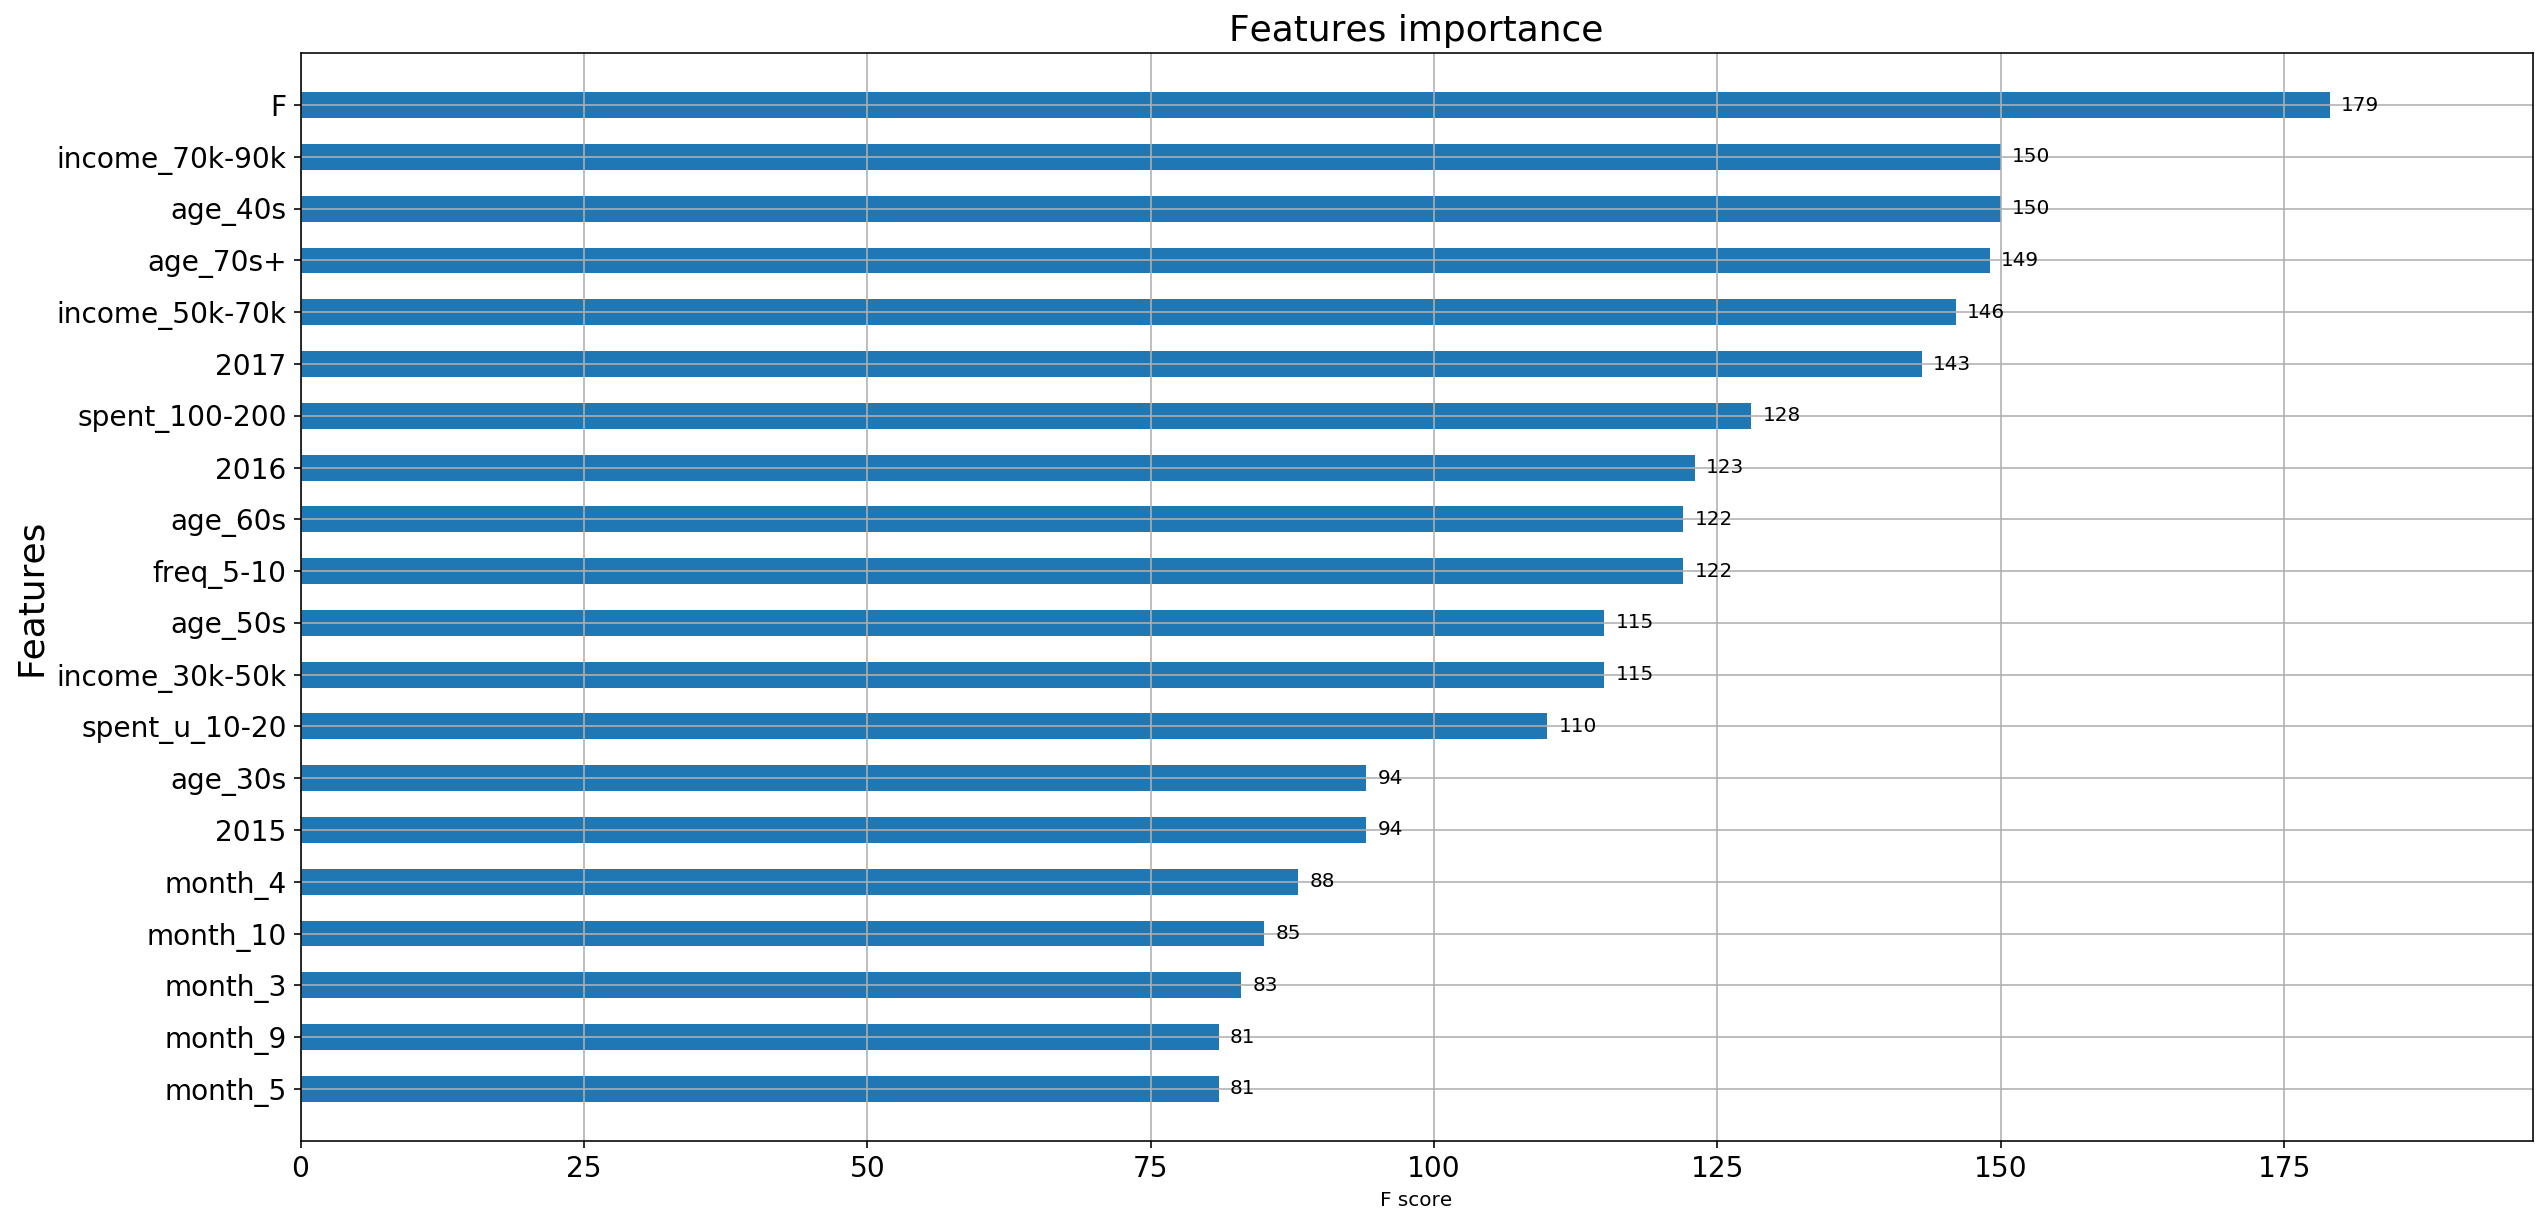

0.6419921635639803
{}
PR AUC: 0.2305293327498411

              precision    recall  f1-score   support

     class 0       0.89      0.60      0.72      1003
     class 1       0.20      0.59      0.30       174

    accuracy                           0.60      1177
   macro avg       0.55      0.59      0.51      1177
weighted avg       0.79      0.60      0.65      1177



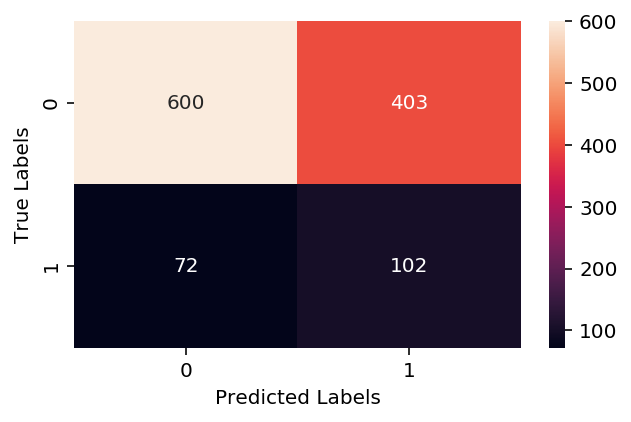

In [18]:
m.plot_feature_importance(X_train, y_train)
clf = m.grid_search(X_train, y_train)
m.evaluate_test_dataset(X_test, y_test, clf)

### offer 8

1. Fit the 4 base model and print the cross validated roc_auc score, PR auc score, and plot the recall 
2. check the two methods to deal with imbalanced dataset

class 0 to class 1 ratio 5.746559633027523
The numbers of class 1 is  698 numbers of class 0 is 4008
************************************************************

Training XGBClassifier :
XGBClassifier
Time taken : 3.57 secs
roc_auc_weighted : 0.6329573435887627
PR AUC: 0.2218470624444808


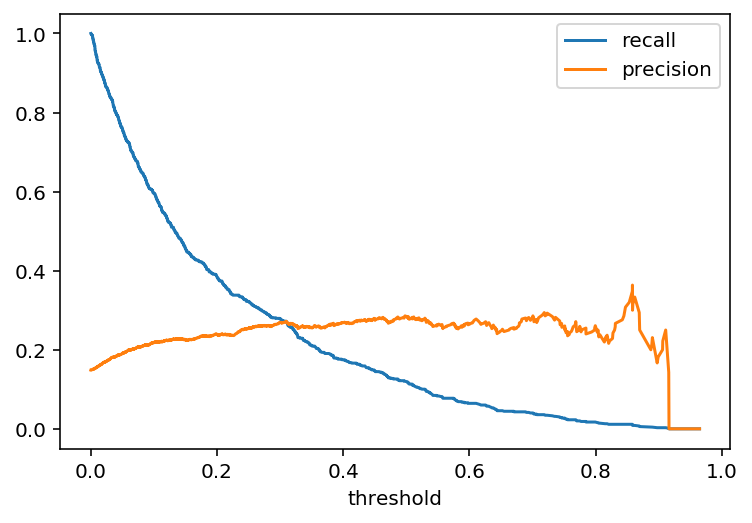

********************
Training RandomForestClassifier :
RandomForestClassifier
Time taken : 4.92 secs
roc_auc_weighted : 0.6434041575802841
PR AUC: 0.2270678767846259


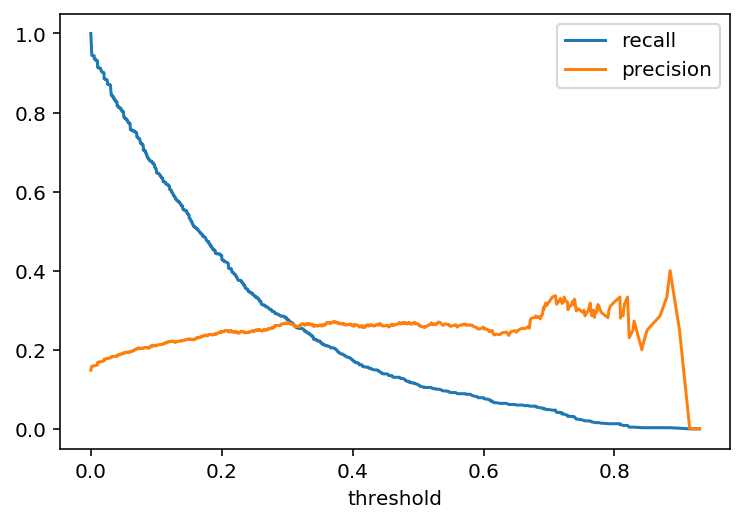

********************
Training AdaBoostClassifier :
AdaBoostClassifier
Time taken : 2.15 secs
roc_auc_weighted : 0.6853042471362556
PR AUC: 0.2596423294854444


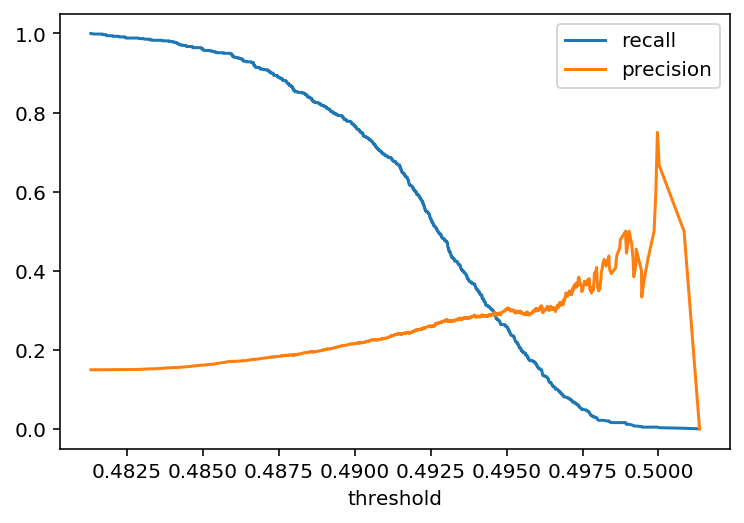

********************
With over sampling:****************************************
Training Pipeline :
Pipeline
Time taken : 6.39 secs
roc_auc_weighted : 0.6373162322825439
PR AUC: 0.22190871785642344


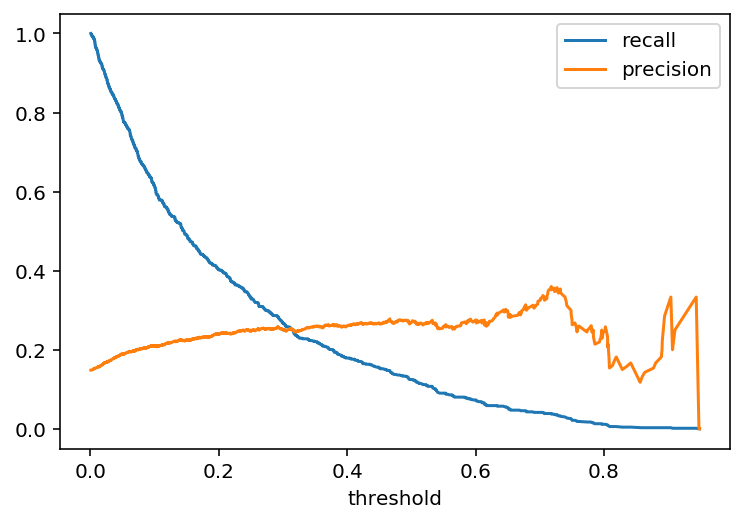

********************
Changing the class weighting hyperparameters:****************************************
Training XGBClassifier :
XGBClassifier
Time taken : 3.75 secs
roc_auc_weighted : 0.6301696533786476
PR AUC: 0.22182794819936974


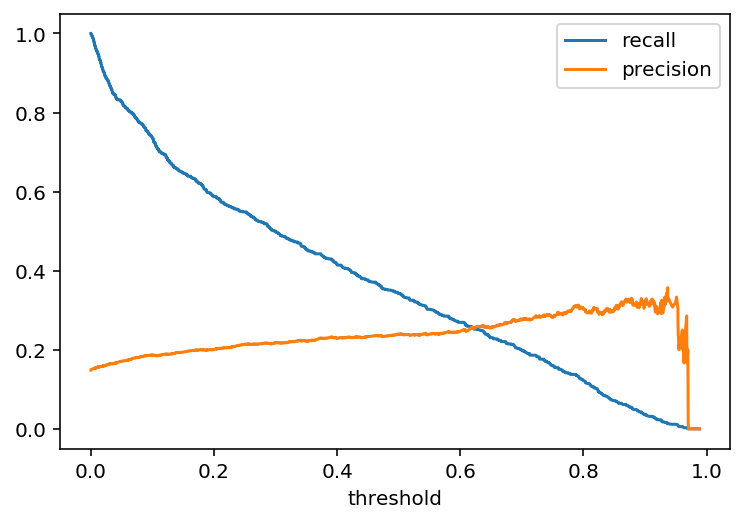

********************


In [19]:
X_train, X_test, y_train, y_test = m.generate_offer_data(data, 8)
m.try_base_models(X_train, y_train, 'roc_auc_ovr_weighted')
m.try_over_sample_and_changing_class_weight('XGBClassifier', X_train, y_train)

Plot the feature importance and evaluate the model performance in the test_dataset

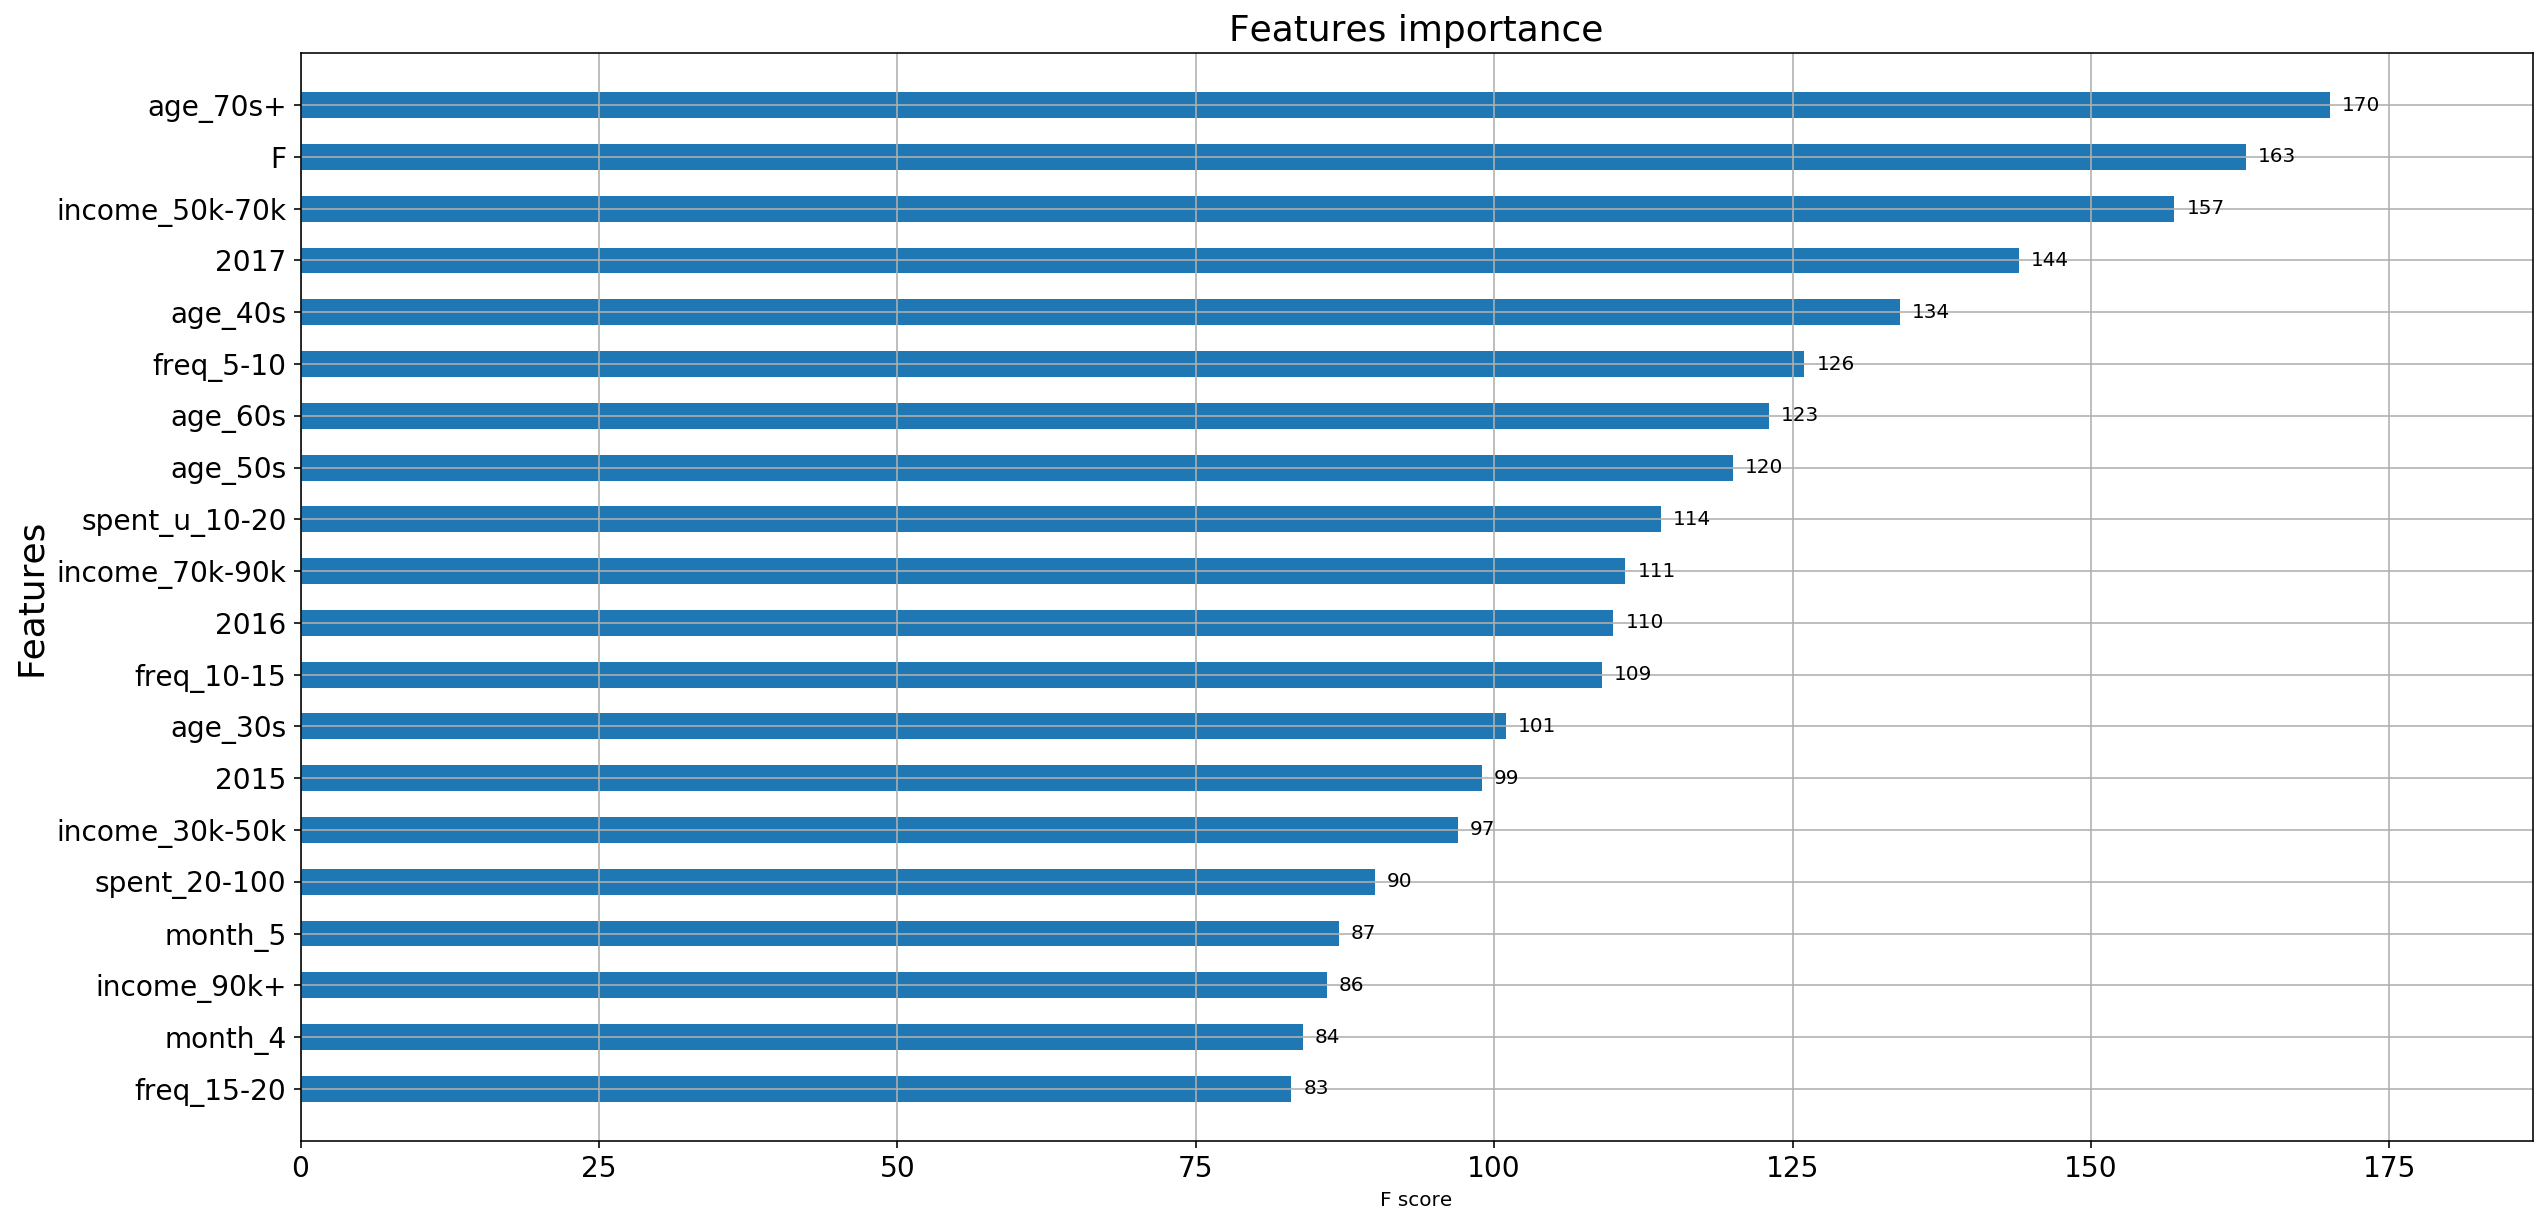

0.6373162322825439
{}
PR AUC: 0.19744522290732175

              precision    recall  f1-score   support

     class 0       0.90      0.58      0.71      1003
     class 1       0.20      0.61      0.30       174

    accuracy                           0.59      1177
   macro avg       0.55      0.60      0.51      1177
weighted avg       0.79      0.59      0.65      1177



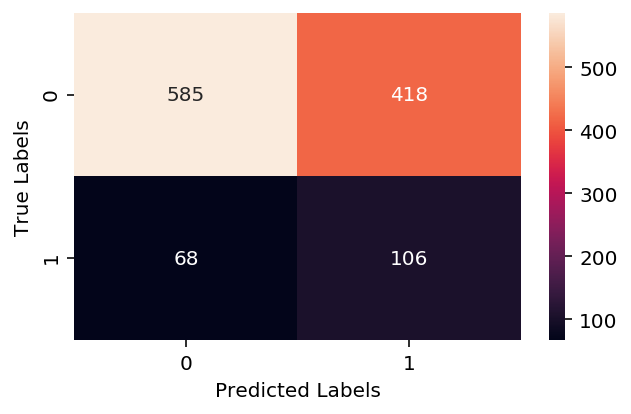

In [20]:
m.plot_feature_importance(X_train, y_train)
clf = m.grid_search(X_train, y_train)
m.evaluate_test_dataset(X_test, y_test, clf)

### offer 9

1. Fit the 4 base model and print the cross validated roc_auc score, PR auc score, and plot the recall 
2. check the two methods to deal with imbalanced dataset

class 0 to class 1 ratio 5.746559633027523
The numbers of class 1 is  698 numbers of class 0 is 4008
************************************************************

Training XGBClassifier :
XGBClassifier
Time taken : 3.63 secs
roc_auc_weighted : 0.6267998977702004
PR AUC: 0.19990382227503134


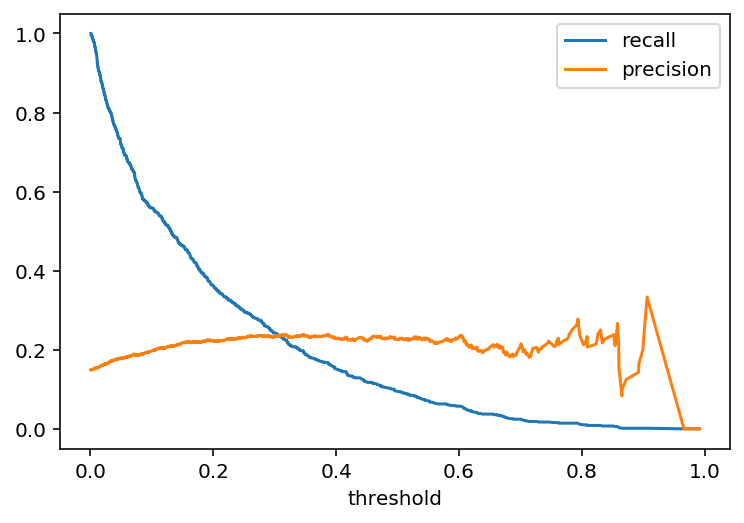

********************
Training RandomForestClassifier :
RandomForestClassifier
Time taken : 4.97 secs
roc_auc_weighted : 0.6323661874802938
PR AUC: 0.19706509793267607


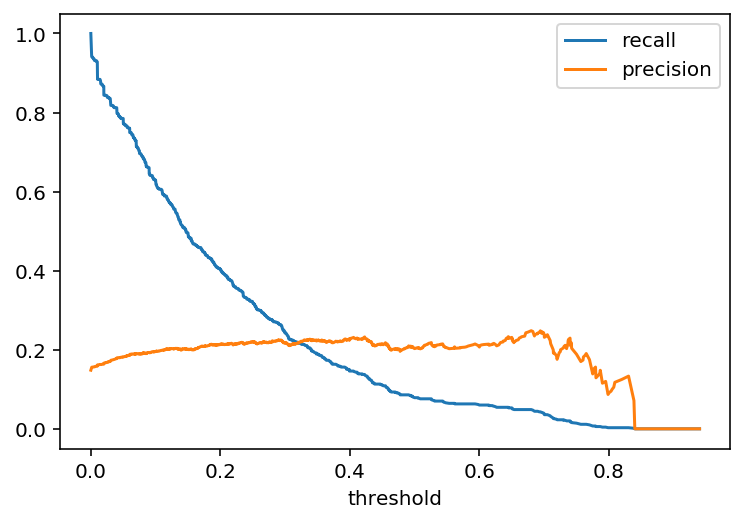

********************
Training AdaBoostClassifier :
AdaBoostClassifier
Time taken : 2.15 secs
roc_auc_weighted : 0.673631801616637
PR AUC: 0.23749174305484927


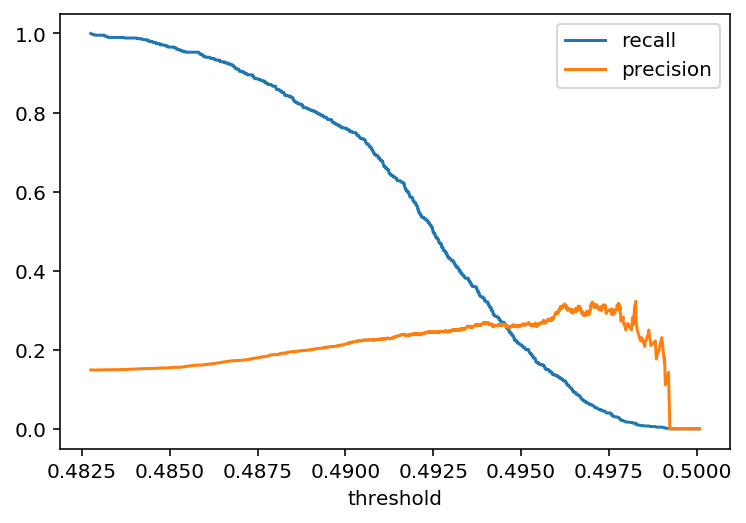

********************
With over sampling:****************************************
Training Pipeline :
Pipeline
Time taken : 6.29 secs
roc_auc_weighted : 0.6272404785529803
PR AUC: 0.20587213260127735


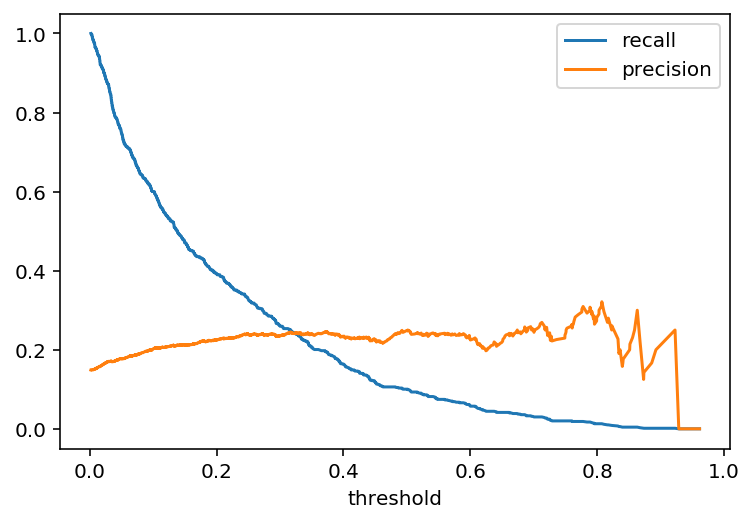

********************
Changing the class weighting hyperparameters:****************************************
Training XGBClassifier :
XGBClassifier
Time taken : 3.77 secs
roc_auc_weighted : 0.6142062555935753
PR AUC: 0.19770655552736963


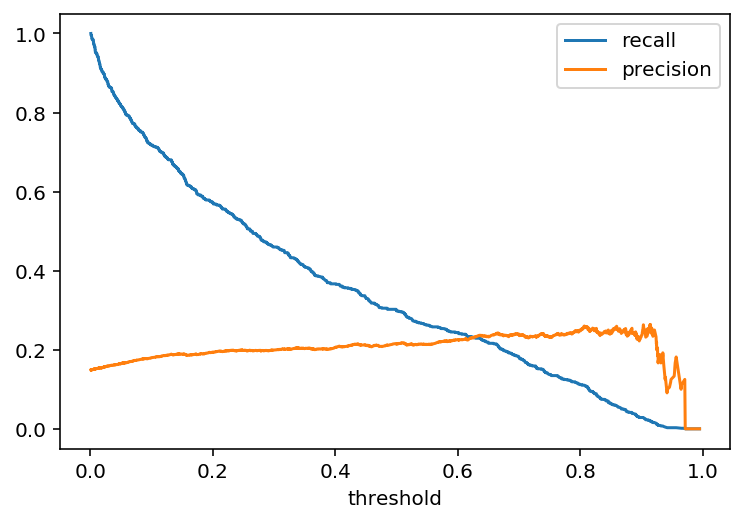

********************


In [21]:
X_train, X_test, y_train, y_test = m.generate_offer_data(data, 9)
m.try_base_models(X_train, y_train, 'roc_auc_ovr_weighted')
m.try_over_sample_and_changing_class_weight('XGBClassifier', X_train, y_train)

Plot the feature importance and evaluate the model performance in the test_dataset

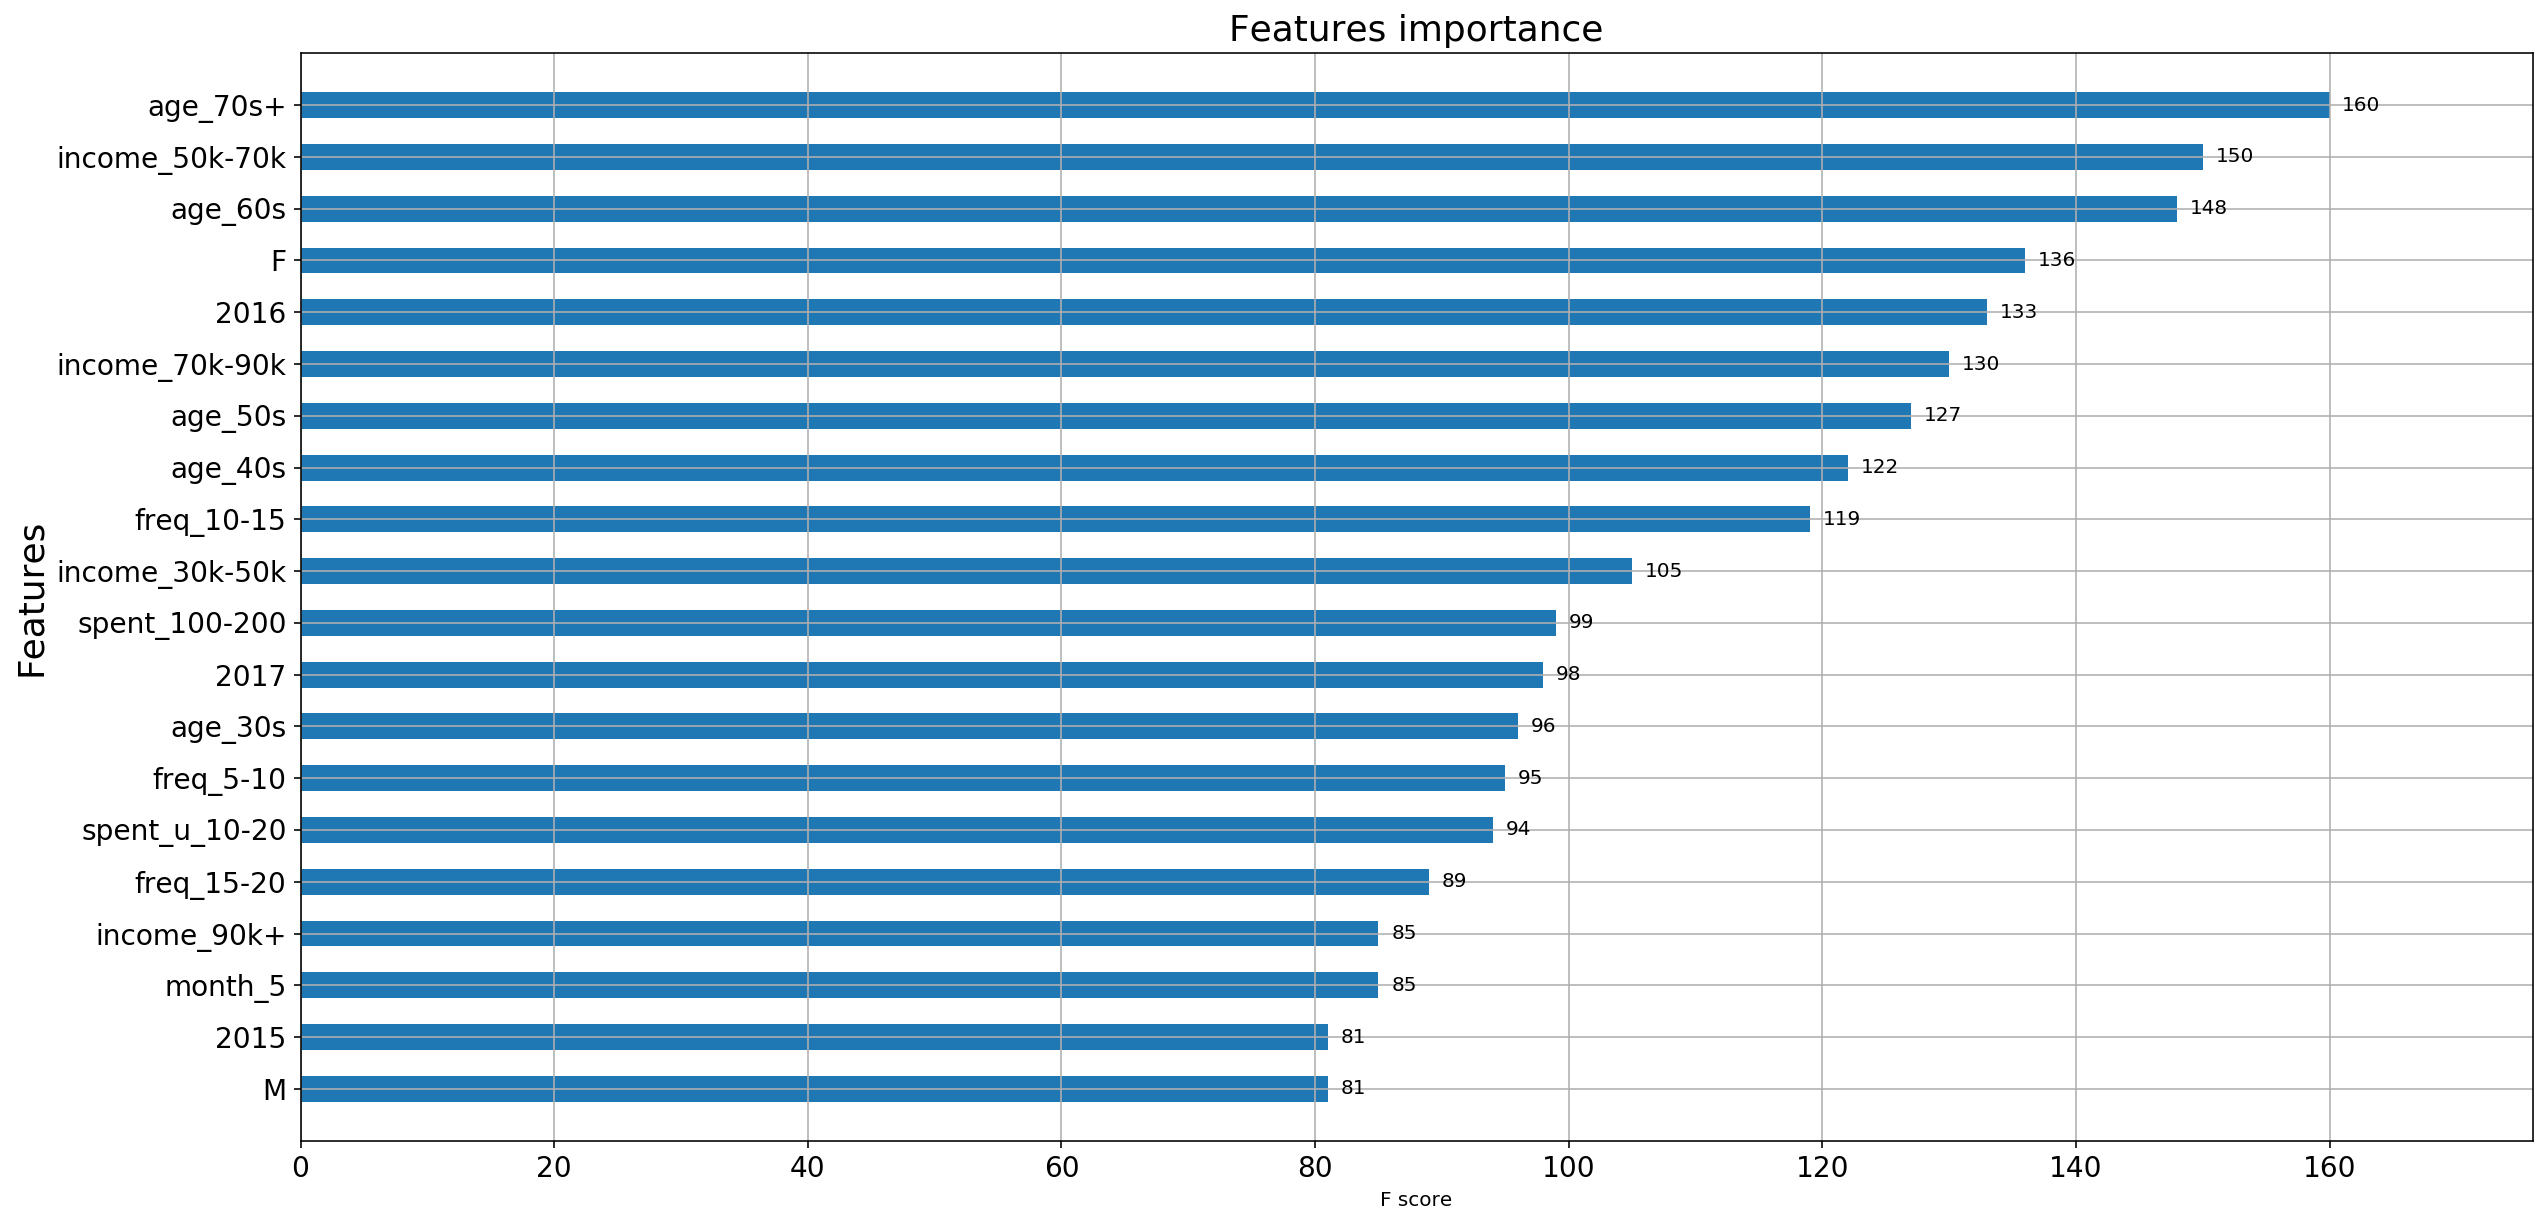

0.6272404785529803
{}
PR AUC: 0.2349332268424189

              precision    recall  f1-score   support

     class 0       0.90      0.57      0.70      1003
     class 1       0.20      0.63      0.30       174

    accuracy                           0.58      1177
   macro avg       0.55      0.60      0.50      1177
weighted avg       0.79      0.58      0.64      1177



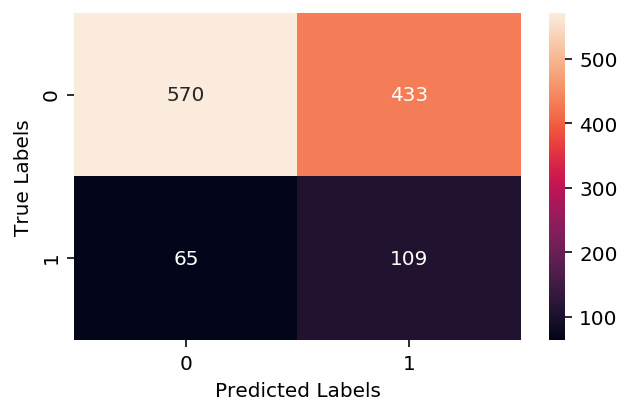

In [22]:
m.plot_feature_importance(X_train, y_train)
clf = m.grid_search(X_train, y_train)
m.evaluate_test_dataset(X_test, y_test, clf)